In [ ]:
# https://github.com/jaimergp/condacolab
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:45
🔁 Restarting kernel...


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [1]:
! mkdir course
% cd course
! git clone https://github.com/NBISweden/workshop_omics_integration.git .
! ls

/content/course
Cloning into '.'...
remote: Enumerating objects: 3905, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 3905 (delta 0), reused 1 (delta 0), pack-reused 3901
Receiving objects: 100% (3905/3905), 992.01 MiB | 33.31 MiB/s, done.
Resolving deltas: 100% (1800/1800), done.
Checking out files: 100% (660/660), done.
_config.yml   img		    README.md	   session_ml
contact.md    index.md		    schedule.md    session_nmf
custom.css    labs.md		    session_gems   session_preprocessing
docker	      LICENSE		    session_gsa    session_topology
environments  precourse.md	    session_intro  session_visualization
Gemfile       reading_materials.md  session_meta   workshop-common


In [ ]:
! mamba env update -n base -f environments/env-preprocessing.yaml

In [2]:
! pip install umap-learn
! pip install umap-learn[plot]
! pip install hdbscan
! pip install dabl
! pip install combat

     |████████████████████████████████| 81kB 5.2MB/s 
     |████████████████████████████████| 1.2MB 11.4MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=82e71d8b40320098ee9024b0b568c6a02308841dd1c9d36c63a0e8f8c5987644
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51362 sha256=cd2ee7dd3389add2e79770d35bd97b1732c8ebb1c072a35daf1bd9b7a3b8bda0
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent
     |████████████████████████████████| 15.8MB 198kB/s 
     |████████████████████████████████| 81kB 11.0MB/s 
     |████████████████████████████████| 122kB 62.9MB/s 
     |████████████████████████████████| 727kB 37.9MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-cp37-none-any.whl size=59439 sha256

In [2]:
% cd session_preprocessing/
! ls

/content/course/session_preprocessing
gene_expression.tsv  metadata.tsv  preprocessing.html  preprocessing.ipynb


- overview of our dataset
- removing redundant or uninformative features
- data imputation
- outlier detection
- data profiling of feature behavior and quality
- data transformation: rescaling, normalization, batch correction

## Preamble
*- what is your dataset size?*

e.g. presence of batch effects -> good to stratify samples if the no of samples per strata allows it

e.g. big -> deep learning techniques
curse of dimensionality

*- what sample metadata is available?*

e.g. clinical variables, sample run order, plate identifier, sequencing depth

- check deviations from the sample population, outliers, confounding factors

*- what methods will you use for downstream analysis?*

- correct format

- scale?

- absolute/relative quantification

*- does it make sense to rescale features/samples?*


In [ ]:
from graphviz import Digraph

g = Digraph('G')
g.attr(rankdir='same', compound='true', fontstyle='Verdana',ranksep = '1', labelloc="t",
    label="(blue = hyperlink)")
  
with g.subgraph(name='cluster0') as c:
    c.attr(label='Data cleaning', fontsize='12', labeljust='left', href='#data-cleaning', fontcolor='blue')
    c.node_attr.update(style='filled', color='white')
    c.node('uninformative data', fontcolor='gray', fontsize='10')
    c.node('redundant data', fontcolor='gray', fontsize='10')
    
with g.subgraph(name='cluster1') as c:
    c.attr(label='Imputation', fontsize='12', labeljust='left', href='#handling-missing-values', fontcolor='blue')
    c.node_attr.update(style='filled', color='white')
    c.node('mean / median', fontcolor='gray', fontsize='10')
    c.node('minimum / 0', fontcolor='gray', fontsize='10')
    c.node('KNN', fontcolor='gray', fontsize='10')
    c.node('Bayesian Ridge', fontcolor='gray', fontsize='10')
    c.node('Decision Tree', fontcolor='gray', fontsize='10')
    
with g.subgraph(name='cluster2') as c:
    c.attr(label='Anomaly detection', fontsize='12', labeljust='left', href='#anomaly-detection', fontcolor='blue')
    c.node_attr.update(style='filled', color='white')
    c.node('Data ranges', fontcolor='gray', fontsize='10')
    c.node('HDBSCAN', fontcolor='gray', fontsize='10')
    c.node('LOF', fontcolor='gray', fontsize='10')
    c.node('Isolation Forest', fontcolor='gray', fontsize='10')
    c.node('One-class SVM', fontcolor='gray', fontsize='10')
    
with g.subgraph(name='cluster3') as c:
    c.attr(label='Data Profiling', fontsize='12', labeljust='left', href='#data-profiling', fontcolor='blue')
    c.node_attr.update(style='filled', color='white')
    c.node('DABL', fontcolor='gray', fontsize='10')
    c.node('Pandas Profiling', fontcolor='gray', fontsize='10')
    c.node('Dimensionality Reduction', fontcolor='gray', fontsize='10')  
    
with g.subgraph(name='cluster4') as c:
    c.attr(label='Data Transformation', fontsize='12', labeljust='left', href='#data-transformation', fontcolor='blue')
    c.node_attr.update(style='filled', color='white')
    c.node('Scaling', fontcolor='gray', fontsize='10')
    c.node('Standardization', fontcolor='gray', fontsize='10')
    c.node('Quantile normalization', fontcolor='gray', fontsize='10')  
    c.node('Normalization', fontcolor='gray', fontsize='10')  
    c.node('ComBat', fontcolor='gray', fontsize='10')  

g.edge('Raw data', 'Data overview', fontsize='12')
g.edge('Data overview', 'uninformative data', lhead='cluster0', fontsize='12')
g.edge('uninformative data', 'KNN', lhead='cluster1', ltail='cluster0')
g.edge('KNN', 'LOF', ltail='cluster1', lhead='cluster2')
g.edge('LOF', 'Pandas Profiling', ltail='cluster2', lhead='cluster3')
g.edge('Pandas Profiling', 'Quantile normalization', ltail='cluster3', lhead='cluster4')
g.edge('Quantile normalization', 'Integration', ltail='cluster4')

g.node('Raw data', shape='box', fontsize='12')
g.node('Data overview', shape='box', fontsize='12', href='#dataset-overview', fontcolor='blue')
g.node('Integration', shape='box', fontsize='12')

g

## Dataset overview

In [3]:
############
# Preamble #
############

### General packages
import os, matplotlib, sklearn, re, warnings
import pandas as pd
import seaborn as sb
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.stats import multitest

### Dim reduction
#from pca import pca
from sklearn.decomposition import PCA as pca
import umap
import umap.plot

### Data imputation
from sklearn.experimental import enable_iterative_imputer  
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RepeatedKFold


### Integrity checks
# Outlier detection
import hdbscan
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

# Data profiling
import pandas_profiling
import dabl

### batch effect removal
from combat.pycombat import pycombat


### Other settings
warnings.simplefilter("ignore", category=sklearn.exceptions.ConvergenceWarning)
np.random.seed(0)

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#% cd session_preprocessing  
## Data importing
metadata=pd.read_csv('metadata.tsv', sep="\t", index_col=0)
gex=pd.read_csv('gene_expression.tsv', sep="\t", index_col=0)

In [5]:
print(gex.shape)
gex.head()

(7029, 59)


,ensembl,gene_description,sample_1,sample_10,sample_11,sample_12,sample_13,sample_14,sample_15,sample_16,sample_17,sample_18,sample_19,sample_2,sample_20,sample_21,sample_22,sample_23,sample_24,sample_25,sample_26,sample_27,sample_28,sample_29,sample_3,sample_30,sample_31,sample_32,sample_33,sample_34,sample_35,sample_36,sample_37,sample_38,sample_39,sample_4,sample_40,sample_41,sample_42,sample_43,sample_44,sample_45,sample_46,sample_47,sample_48,sample_49,sample_5,sample_50,sample_53,sample_54,sample_55,sample_56,sample_57,sample_58,sample_59,sample_6,sample_7,sample_8,sample_9
gene,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
OR1S1,ENSG00000280204,Olfactory receptor family 1 subfamily S member...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,NaN,0.0,0.0,0.0,0.0,0.0,0.016,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,NaN,0.0
MBD3L4,ENSG00000205718,Methyl-CpG binding domain protein 3 like 4,0.0,NaN,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.001,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,NaN,NaN,0.0
DEFB115,ENSG00000215547,Defensin beta 115,0.0,0.0,0.000,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032,0.0,0.0,0.0
OR2B3,ENSG00000204703,Olfactory receptor family 2 subfamily B member 3,0.0,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.000,0.0,0.0,0.0
IFNA13,ENSG00000233816,Interferon alpha 13,0.0,0.0,0.000,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,NaN,0.0,0.0,0.000,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,NaN,NaN,0.0


In [6]:
metadata.head()

,group,gender,severity
samples,,,
sample_1,group1,Male,2.0
sample_2,group1,Male,3.0
sample_3,group1,Female,4.0
sample_4,group1,Female,2.0
sample_5,group1,Male,1.0


In [7]:
metadata.groupby('group')['gender'].agg('count')

group
control     7
group1     35
group2     15
Name: gender, dtype: int64

In [8]:
metadata.fillna('no_disease').groupby('severity')['gender'].agg('count')

severity
1.0            1
2.0           12
3.0           20
4.0           17
no_disease     7
Name: gender, dtype: int64

In [9]:
# further add the group information to the columns names (groups: g1, g2 and ct) dataset names to make it easier later, and use a dataframe only with gene expression values.
metadata.loc[:,'group_sample']=metadata.index+'.'+metadata.group.str.replace('(roup)','', regex=True).str.replace('control','ct')

gex.columns=[metadata.loc[x,'group_sample'] if x in metadata.index.values else x for x in gex.columns.values]
metadata=metadata.reset_index().set_index('group_sample')

gex_values=gex.loc[:, ~gex.columns.isin(['ensembl','gene_description'])] #only values
gex_values.head()

,sample_1.g1,sample_10.g1,sample_11.g1,sample_12.g1,sample_13.g1,sample_14.g1,sample_15.g1,sample_16.g1,sample_17.g1,sample_18.g1,sample_19.g1,sample_2.g1,sample_20.g1,sample_21.g1,sample_22.g1,sample_23.g1,sample_24.g1,sample_25.g1,sample_26.g1,sample_27.g1,sample_28.g1,sample_29.g1,sample_3.g1,sample_30.g1,sample_31.g1,sample_32.g1,sample_33.g1,sample_34.g1,sample_35.g1,sample_36.g2,sample_37.g2,sample_38.g2,sample_39.g2,sample_4.g1,sample_40.g2,sample_41.g2,sample_42.g2,sample_43.g2,sample_44.g2,sample_45.g2,sample_46.g2,sample_47.g2,sample_48.g2,sample_49.g2,sample_5.g1,sample_50.g2,sample_53.ct,sample_54.ct,sample_55.ct,sample_56.ct,sample_57.ct,sample_58.ct,sample_59.ct,sample_6.g1,sample_7.g1,sample_8.g1,sample_9.g1
gene,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
OR1S1,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,NaN,0.0,0.0,0.0,0.0,0.0,0.016,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,NaN,0.0
MBD3L4,0.0,NaN,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.001,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,NaN,NaN,0.0
DEFB115,0.0,0.0,0.000,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032,0.0,0.0,0.0
OR2B3,0.0,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.000,0.0,0.0,0.0
IFNA13,0.0,0.0,0.000,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,NaN,0.0,0.0,0.000,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,NaN,NaN,0.0


## Data Cleaning
- repeated/uninformative data

for e.g., if this was a proteomic -> how to deal w/ 2 isoforms of the same protein? if it's a dataset where multiple features (e.g. probes) are associated w/ the same gene?

1. Dropping repeated features -> risking losing potentially important info

2. summarizing all related featrues by computing means/medians -> dim potentially important biological variation for different features

3. modelling all separately -> keeping all identified variation, but risking having our downstream analyses biased by features that display higher number of dupications

*crossover studies also present

--> choosing the best solution will depend on dataset and objective

In [10]:
if (gex.index.duplicated().any()):
  print('Duplicated genes found.')
else:
  print('No duplicates found.')

No duplicates found.


In [11]:
if(gex.columns.duplicated().any()):
    print('Duplicated columns found.')
else:
    print('No duplicates found.')

No duplicates found.


there may be uninformative features. for instance, we may have invariant features (those whose variance $\sigma ^2$ is null ), or those that are null throughout

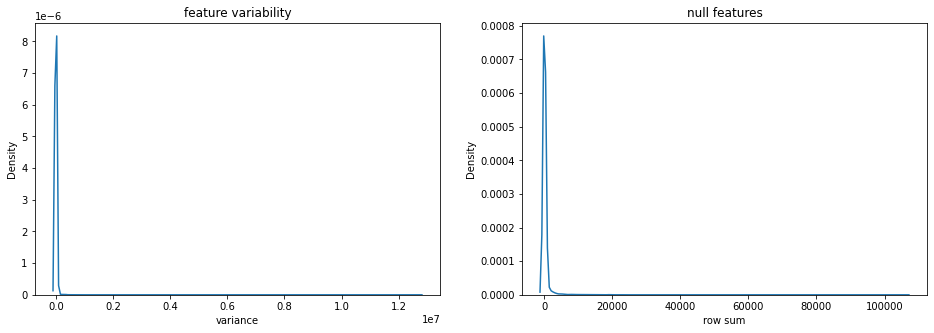

In [12]:
fig,ax =plt.subplots(ncols=2, figsize=(16,5))
ax=ax.flatten()
sb.kdeplot( gex_values.var(1, skipna=True), ax=ax[0])
ax[0].set_title('feature variability')
ax[0].set_xlabel('variance')
sb.kdeplot( gex_values.sum(1, skipna=True), ax=ax[1], label='this')
ax[1].set_title('null features')
ax[1].set_xlabel('row sum')
plt.show()

These uninformative features will add nothing to any sample vs sample or feature vs feature comparisons that we may be interested. We will remove them from our dataset as they contribute with no information to our downstream analyses.

In [14]:
## flagging uninformative features for removal
uninformative_features=gex_values.index.values[(gex_values.sum(1, skipna=True) == 0) | (gex_values.var(1, skipna=True) == 0)]

## handling missing values
- important to understand missingness: is a feature absent in a sample because of instrument detection limits, or because it is not present in a sample?

2 ways:
1. dropping: never desirable to drop precious (and expensive) data, but sometimes unavoidable

2. imputing: missing value imputation can be done in different ways, and should be done carefully or it may introduce spurious bias in the data

**Dropping** 

If our data has many missing values, one should question the validity of any hypotheses generated with its samples - we do not want to predict biomarkers or sample strata based on missing/imputed data. For this reason, we examine both features and samples for missing data. However, note that by removing features you are reducing the degrees of freedom of your analysis and potentially losing biologically important information.
We start by examining at the sample level. We see that samples have about ~20% missing values, except for three samples which have a very high (>60%) number of missing values. We will drop these from further analysis.

sample_1.g1     0.101864
sample_10.g1    0.101864
sample_11.g1    0.096458
sample_12.g1    0.099018
sample_13.g1    0.102860
dtype: float64


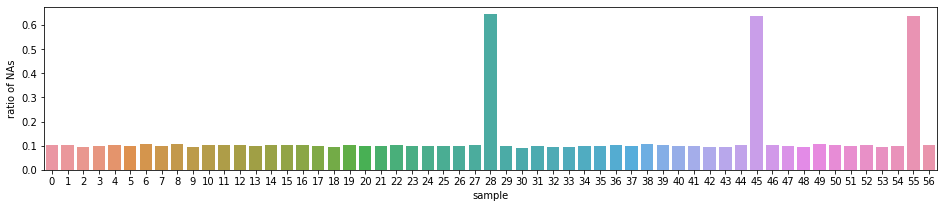

In [16]:
### NA ratios per sample
NAs_sample_ratios=gex_values.isna().sum()/gex_values.index.shape[0]
print(NAs_sample_ratios.head())
fig,ax=plt.subplots(figsize=(16,3))
sb.barplot(
    x=np.arange(0,gex_values.shape[1]),
    y=NAs_sample_ratios.values,
    ax=ax
)
plt.xlabel('sample');
plt.ylabel('ratio of NAs');

Note that because of our sample numbers per group above, (control = 7, group1 = 35, group2 = 15), we should question at this point whether the number of NAs is imbalanced and one group shows more than the others. However, we see that the mean and distributions of NAs between samples is fairly similar between groups. The "outliers" shown in the boxplots are those 3 samples showing very high NA abundance above, all of which belong to group1.

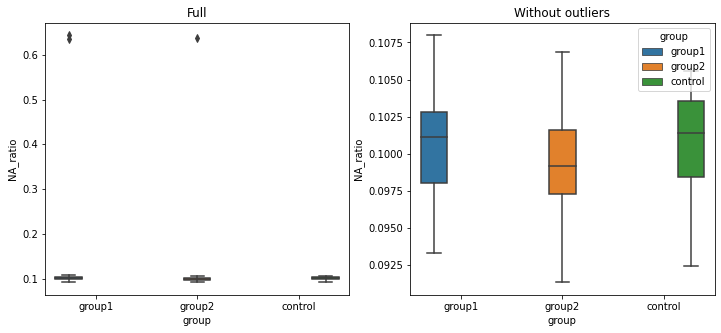

In [17]:
### NA by sample groups
NAs_sample_groups = metadata[['group']].merge(pd.DataFrame(NAs_sample_ratios, columns = ['NA_ratio']),
                                              left_index = True, right_index = True, how = 'right')

fig,ax=plt.subplots(ncols=2, figsize=(12,5));
ax=ax.flatten();
## Full plot
g=sb.boxplot(
    data=NAs_sample_groups, 
    x='group', 
    y='NA_ratio', hue='group',
    ax=ax[0]
);
g.legend_.remove()
ax[0].title.set_text('Full')

## No outliers
sb.boxplot(
    data=NAs_sample_groups, 
    x='group', y='NA_ratio', hue='group',
    showfliers=False,
    ax=ax[1]
)
ax[1].title.set_text('Without outliers')

We also examine missingness at the gene level. We see that most genes have very low number of NAs (1st quartile 11%, 3rd quartile 16%, mean 13%). But for some genes, they display a very high number of missing values (max 30%).

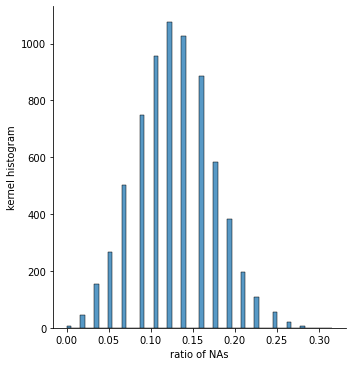

In [18]:
# NAs per gene
NAs_gene_ratios=(gex_values.isna().sum(1)/gex_values.columns.shape[0])

##### Description of missignness at gene level:
#NAs_gene_ratios.describe()

## Because we have >7000 genes, we plot their distributions as histogram and kernel density plots.
sb.displot(NAs_gene_ratios)
plt.xlabel('ratio of NAs');
plt.ylabel('kernel histogram');

We will remove the 3 problematic samples above, and genes displaying >15% missing values (i.e. NAs in more than 8.5 samples).

In [19]:
## problematic samples show NA > 60%
problematic_samples = NAs_sample_groups.index[NAs_sample_groups.NA_ratio > 0.6]

## problematic genes
problematic_genes = NAs_gene_ratios.index[NAs_gene_ratios > 0.15]

## filtering
# recall that we selected uninformative features above based on variance and row sums
gex_filtered=gex_values.copy().loc[
    (~gex_values.index.isin(np.append(problematic_genes, uninformative_features))),]
gex_filtered=gex_filtered.loc[:,  ~gex_values.columns.isin(problematic_samples)]

## 4767 genes, 54 samples
gex_filtered.shape

(4767, 54)

**Imputation**


We can employ different strategies for dealing with the missing values. It may be useful to **flag** missing values, as this will permit identifying and saving which features/samples have missing values to examine the influence of missingness and imputation. There are different types of imputation:

**Single value imputation** - Imputation by one plausible value. Examples:
- Mean / Median / Minimum / 0 - filling data based on a constant.

- KNN - filling data based on most similar neighbours

**Multiple imputation** - The distributions of the observed data are used to estimate multiple values that reflect the uncertainty around the true value, and pooled to predict the imputed value.

- Bayesian Ridge regression - regularized linear regression imputation

- Decision tree regression - non-linear regression imputation

Note that the choice of imputation method may have dramatic effects on our data behavior, and could bias any analyses done with the data. For instance, how would we expect samples to cluster if they have a high number of 0-imputed features compared to samples with very few or no 0-imputed features?
Scikitlearn and autoimpute present many imputation strategies. Here, we'll explore some of the imputation strategies through scikitlearn.

**Mean / Median / Minimum / 0**
We could impute based on row (gene) mean, median, minimum or 0. Note that considering these imply different assumptions about the cause of missingness: by considering mean or median, we are assuming that value missingness is random; by considering minimum, minimum ∗ 0.95 or 0, we are assuming that quantifications are missing due to instrument sensitivity for instance. Choosing one or the other will thus depend on the technology used and on what we know about missigness in our data (further discussed at the end of this section).

Note that using mean, median, minimum or 0 does not account for correlations between features, and may severely bias the data.

We start by doing 0-imputation, or based on row-wise mean, median or minimum.

In [20]:
# impute values as 0
imputed_GEX_0=gex_filtered.copy().fillna(0)

# impute values based on row means
imputed_GEX_rowMEAN=pd.DataFrame(
    SimpleImputer(strategy='mean').fit_transform(gex_filtered.T).T,
    index=gex_filtered.index, columns=gex_filtered.columns)

# row median
imputed_GEX_rowMEDIAN=gex_filtered.copy().T.fillna(gex_filtered.median(1)).T

#row min
imputed_GEX_rowMIN=gex_filtered.copy().T.fillna(gex_filtered.min(1)).T

Note however that different groups of samples are present, so perhaps a more accurate way to account for between-group variability is to impute based on group-specific metrics. We do so below with mean, median, minimum.

In [21]:
def impute_by_group(impute_strategy):
    """
    Imputes our dataset based on group-wise information.
    
        impute_strategy      string. options: 'min','min*0.95', or any argument to ``strategy`` in SimpleImputer.   
    
    Returns:
        imputed dataframe
    """
    group1=gex_filtered.copy().loc[:, gex_filtered.columns.str.contains('\.g1$')] #group1
    group2=gex_filtered.copy().loc[:, gex_filtered.columns.str.contains('\.g2$')] #group2
    groupCT=gex_filtered.copy().loc[:, gex_filtered.columns.str.contains('\.ct$')] #controls
    
    # SimpleImputer does not include "min" as argument, so we compute it here ourselves
    if(impute_strategy in ['min', 'min*0.95']):
        imputed_g1=group1.T.fillna(value=group1.min(1, skipna=True)).T
        imputed_g2=group2.T.fillna(value=group2.min(1, skipna=True)).T
        imputed_ct=groupCT.T.fillna(value=groupCT.min(1, skipna=True)).T
    # mean and median are valid arguments to SimpleImputer(strategy=...) 
    elif(impute_strategy in ['mean', 'median']):    
        #values imputed from samples in group1
        imputed_g1=pd.DataFrame( 
            SimpleImputer(strategy=impute_strategy).fit_transform(group1.T).T,
            index=group1.index, columns=group1.columns)
        #values imputed from samples in group2
        imputed_g2=pd.DataFrame(  
            SimpleImputer(strategy=impute_strategy).fit_transform(group2.T).T,
            index=group2.index, columns=group2.columns)
        #values imputed from samples in control
        imputed_ct=pd.DataFrame(  
            SimpleImputer(strategy=impute_strategy).fit_transform(groupCT.T).T,
            index=groupCT.index, columns=groupCT.columns)
    else:
        raise ValueError('Incorrect argument for ``imput_strategy``. Options: `min`, `min*0.95`, `mean`, or `median`.')
        
    output=imputed_g1.join(imputed_g2).join(imputed_ct) #joining imputed datasets
    return(output)



## Imputation by group mean in each group
imputed_GEX_groupMEAN=impute_by_group('mean')

## Imputation by group median in each group
imputed_GEX_groupMEDIAN=impute_by_group('median')

##  Imputation by minimum in group
imputed_GEX_groupMIN=impute_by_group('min')

## Imputation by min*0.95
imputed_GEX_groupMIN95=impute_by_group('min*0.95')

**KNN imputation**

We may also fill data based on the K-nearest neighbour (KNN) similarity. In this approach, the mean among the k nearest neighbors is used after training a KNN model. Note that the key hyperparameter here is the number of neighbours to consider. An often used good choice for $k = \sqrt{sample number} = \sqrt{57} \approx 8$.  We will perform a grid search on odd numbers for $1 \leq k \leq 20$.

We start by encoding class labels as numbers, and identify the optimum k by considering that all neighbors within a boundary have the same weight (weights = uniform), and use Euclidean distance as the metric to quantify distance between neighbouring points (metric = euclidean). We use sample groups (g1, g2, ct) as class labels since KNN is a supervised technique, and use 5-fold crossvalidation. We use accuracy as score for training and testing data. We should bear in mind that data standardization may be required (as we further discuss in another section below), but we skip it for now for simplicity sake.

In [27]:
# Encode class labels (groups) into integers to use for the estimators below
class_labels=sklearn.preprocessing.LabelEncoder().fit_transform(gex_filtered.columns.str.replace('.+\.','') )

# Standardized gene expression
std_gex=pd.DataFrame(sklearn.preprocessing.StandardScaler().fit_transform(gex_filtered.T), index=gex_filtered.columns, columns=gex_filtered.index).T

### We imput NA with random values in the same range of the min
np.random.seed(0)
random_df=np.random.uniform( 
    low=std_gex.min(), 
    high=std_gex.max(),
    size=std_gex.shape)

# impute the values where NAs are found
randomly_imputed=std_gex.copy()
randomly_imputed[randomly_imputed.isna()]=random_df

# standardizing mean-imputed data
std_gex_groupmean=pd.DataFrame(
    sklearn.preprocessing.StandardScaler().fit_transform(imputed_GEX_groupMEAN.T),
    index=imputed_GEX_groupMEAN.columns, columns=imputed_GEX_groupMEAN.index)

# gridsearch to find optimum k based on randomly imputed data
knn=sklearn.neighbors.KNeighborsClassifier(metric='euclidean')
grid_pars={
    'n_neighbors': range(1, 21),
    ### uncomment the following lines to tune the `weights` and `metric` hyperparameters
    ### remember to remove these arguments from the function `knn` above
#       'weights': ['uniform','distance'], 
#       'metric':['euclidean','manhattan']
}

#5-fold CV, preserving label distribution/fold, repeated 20 times
skfold=RepeatedStratifiedKFold(n_splits=5, n_repeats=20) 
knn_gridcv=sklearn.model_selection.GridSearchCV(
    knn, grid_pars, 
    cv=skfold,
    scoring={'Accuracy': sklearn.metrics.make_scorer(sklearn.metrics.accuracy_score)},
    refit='Accuracy', return_train_score=True
) 
knn_results_random=knn_gridcv.fit( randomly_imputed.T.values, class_labels)

print(f'''
      Random-imputed data - optimum k: {knn_results_random.best_params_['n_neighbors']}
      \tAccuracy (train): {np.round(knn_results_random.cv_results_['mean_train_Accuracy'][knn_results_random.best_index_],2)}
      \tAccuracy (test): {np.round(knn_results_random.cv_results_['mean_test_Accuracy'][knn_results_random.best_index_],2)}
      ''')


      Random-imputed data - optimum k: 4
      	Accuracy (train): 0.83
      	Accuracy (test): 0.76
      


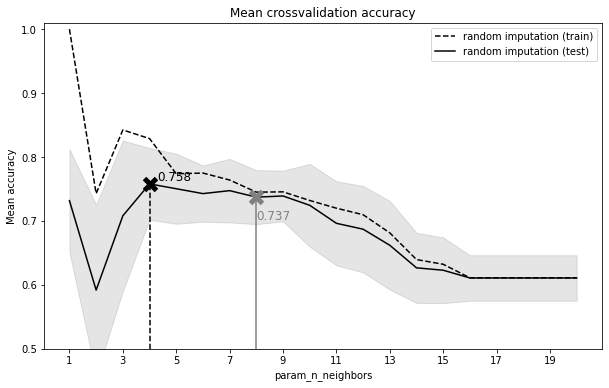

In [28]:
########################################
# Best results of KNN run
knn_random_df_output=pd.DataFrame(knn_results_random.cv_results_); 
best_index=knn_results_random.best_params_['n_neighbors']
best_score=knn_results_random.best_score_

########################################
# Imputation by KNN for later use
imputed_GEX_KNN=pd.DataFrame(
    KNNImputer(n_neighbors=best_index).fit_transform(std_gex.T),
    index=std_gex.columns, columns=std_gex.index).T

# Imputation by KNN with k = 8
imputed_GEX_KNN8=pd.DataFrame(
    KNNImputer(n_neighbors=8).fit_transform(std_gex.T),
    index=std_gex.columns, columns=std_gex.index).T

########################################
# Plotting
fig,ax=plt.subplots(figsize=(10,6))

# model score
sb.lineplot(
    data=knn_random_df_output, x='param_n_neighbors', y='mean_train_Accuracy',
    color='black', label='random imputation (train)')
sb.lineplot(
    data=knn_random_df_output, x='param_n_neighbors', y='mean_test_Accuracy',
    color='black', label='random imputation (test)');
ax.fill_between(range(1,21), 
                knn_random_df_output['mean_test_Accuracy'] - knn_random_df_output['std_test_Accuracy'],
                knn_random_df_output['mean_test_Accuracy'] + knn_random_df_output['std_test_Accuracy'],
                        alpha=0.1, color='black')

# best score
ax.annotate("%0.3f" % best_score, (best_index+0.3, best_score + 0.005), color='black', size='12')
ax.plot([best_index]*2,[0,best_score],color='black', marker='x', markeredgewidth=5, ms=12)

# k = 8
ax.plot([8]*2,[0,knn_results_random.cv_results_['mean_test_Accuracy'][7]],color='gray', marker='x', markeredgewidth=5, ms=12) #k = 8, random imputed
ax.annotate("%0.3f" % knn_results_random.cv_results_['mean_test_Accuracy'][7], 
            (8, knn_results_random.cv_results_['mean_test_Accuracy'][7]-0.035), color='gray', size='12')

ax.lines[0].set_linestyle("--")
ax.lines[2].set_linestyle("--")
ax.legend().get_lines()[0].set_linestyle("--")

ax.set(ylabel='Mean accuracy', ylim=(0.5,1.01));
ax.set_xticks(np.arange(1,20,2));
plt.title('Mean crossvalidation accuracy');

Based on the accuracy of the test data we find an optimum 𝑘=4 (black cross above), though a  𝑘=8 achieves a similar accuracy (gray cross above).
Our selection of best k is done based on the test data and not on the training data, though the latter has substantially higher accuracy. Note that we get a perfect training accuracy for k = 1 but poor testing accuracy on training data (why is this so?). We also found that k = 1 has a similarly high acuracy in the testing set. However, we should be careful in using very low k as these can usually can be noisy and lead to more "complex" models in terms of the decision boundaries. In turn, larger k will usually present smoother decision boundaries, implying lower variance but higher bias.

Imputation with Decision Trees and on Bayesian Ridge Regression
For multivariate imputation we could apply a similar approach, where a model is built for each feature with missing values, modeled after the n-closest (or all) known features. The regressed model is then used to predict the missing values. This is done iteratively for each feature, and repeated up to a maximum number of iterations.

Decision Trees and Bayesian Ridge Regression are multivariate imputation strategies. Decision trees are used for a non-linear imputation after regressing features on complete data. In Bayesian ridge regression, features are imputed based on the distributions of the n most similar features, taking advantage of the 𝐿2 regularization to control for overfitting assuming normally distributed model parameters as priors, and using those to estimate distributions of possible parameter values for the model (as opposed to single values computed through frequentist linear regression).

For each round of imputation of a feature, a stopping criterion is defined as
$\frac{abs(max(X_t - X_{t-1}))}{abs(max(X_{known_vals}))} < tol $

where $X_t$ is the value of the feature at iteration $t$, and $tol$ is predefined value (default tol = 0.001). This is done for each feature in an iterative fashion, repeated for max_iter imputation rounds until the stopping criterion is reached, and the results of the final imputation round are returned.

For both approaches, we specify that minimum and maximum imputed values must be within the value range of the standardized dataset. We increase the maximum number of iterations and the 10 closest features (rather than the entire dataset) in order to speed up computation. The following cell takes a few minutes to run and raises two warnings.


In [30]:
## Imputation using Bayesian Ridge Regression
# set min/max imputed values as the dataset min/max (instead of default -Inf/+Inf)
# use 100 iterations and 10 nearest features to speed computations. 
imputed_GEX_bayesianr = pd.DataFrame(
    IterativeImputer(
        estimator=BayesianRidge(),
        min_value = np.nanmin(std_gex),
        max_value = np.nanmax(std_gex),
        max_iter = 100,
        n_nearest_features = 10,
        tol = 0.01
    ).fit_transform(std_gex.T),
    index = std_gex.columns, columns = std_gex.index).T

In [31]:
Imputed_GEX_trees = pd.DataFrame(
    IterativeImputer(
        estimator=DecisionTreeRegressor(max_features='sqrt'),
        min_value = np.nanmin(std_gex),
        max_value = np.nanmax(std_gex),
        max_iter = 100,
        n_nearest_features = 10,
        tol = 0.01
    ).fit_transform(std_gex.T),
    index=std_gex.columns, columns = std_gex.index).T

In [ ]:
# Benchmarking imputation method
## takes ~40 mins to run on 12 cores.
import time
start_time = time.time()
print('Begin estimate. Time: '+str(start_time))


score_imputer = pd.DataFrame() # collect scores from all imputers
br_estimator = BayesianRidge() # we use BayesianRidge as estimator for the cross-validated data

# mean, median, and 0 imputation
for strategy in ('mean', 'median','constant'):
    if(strategy == 'constant'):
        #for `constant`, we provide the imputation value
        estimator = make_pipeline( SimpleImputer(strategy=strategy, fill_value=0), br_estimator)
    else:
        estimator = make_pipeline(SimpleImputer(strategy=strategy), br_estimator)
    
    #5-fold CV, preserving label distribution/fold, repeated 10 times
    skfold=RepeatedStratifiedKFold(n_splits=5, n_repeats=10) 
    # 5-fold cross validation to compute neg_MSE
    score_imputer[strategy] = sklearn.model_selection.cross_val_score(
        estimator, std_gex.T, class_labels, 
        scoring='neg_mean_squared_error',
        cv=skfold
    )
    
### WARNING: takes a long time to run! ()
# estimate score after imputation of missing values
# expect convergence warnings
estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt'),
    KNeighborsRegressor(n_neighbors=4)
]

for impute_estimator in estimators:
    print('>>>>>> Performing '+impute_estimator.__class__.__name__)
    estimator = make_pipeline(
        IterativeImputer(
            estimator=impute_estimator,
            min_value=np.nanmin(std_gex), #minimum imputed value
            max_value=np.nanmax(std_gex), #maximum imputed value
            max_iter = 10, #maximum number of iterations, we decrease it 10x to improve speed
            n_nearest_features = 10,
            tol = 0.01
        ),
        br_estimator
    )
    #5-fold CV, preserving label distribution/fold, repeated 10 times for speed
    skfold=RepeatedStratifiedKFold(n_splits=5, n_repeats=10) 
    score_imputer[impute_estimator.__class__.__name__] = \
        cross_val_score(
            estimator, std_gex.T, class_labels, scoring='neg_mean_squared_error',
            cv=skfold, n_jobs=-1
        )
end_time = time.time()
print('Minutes: '+str((end_time - start_time)/60))

score_imputer=-1*score_imputer 

fig,ax=plt.subplots()
sb.barplot(
    data=score_imputer.unstack().reset_index().drop('level_1',1).rename(columns={'level_0':'method',0:'MSE'}),
    x='MSE', y='method', 
    order=score_imputer.mean().sort_values(ascending=False).index, 
)
ax.set_xlabel('MSE (smaller is better)');

In [ ]:
### Complete data
complete_gex=pd.read_csv(data_dir+'gene_expression_complete.tsv', sep="\t", index_col=0)
complete_gex=complete_gex.loc[:,~complete_gex.columns.isin(['ensembl','gene_description'])]
complete_gex.columns=metadata.reset_index().set_index('samples').loc[
    [x for x in complete_gex.columns.values if x in metadata['samples'].values],'group_sample']
complete_gex=complete_gex.loc[gex_filtered.index, gex_filtered.columns]

# standardize complete dataset
complete_gex_std=pd.DataFrame(sklearn.preprocessing.StandardScaler().fit_transform(complete_gex.T), index=complete_gex.columns, columns=complete_gex.index).T

# dictionary with all imputed datasets
df_dict={
    'constant_0':imputed_GEX_0, 'row_mean':imputed_GEX_rowMEAN, 'row_median':imputed_GEX_rowMEDIAN,
    'row_min':imputed_GEX_rowMIN, 'group_mean':imputed_GEX_groupMEAN, 'group_median':imputed_GEX_groupMEDIAN,
    'group_min':imputed_GEX_groupMIN, 'group_min95':imputed_GEX_groupMIN95, 'knn':imputed_GEX_KNN, 'knn8':imputed_GEX_KNN8, 'bayesian_ridge':imputed_GEX_bayesianr, 'decision_trees':imputed_GEX_trees
}

imputation_mse=pd.DataFrame()
for imp_method in df_dict.keys():
    if(imp_method in ['knn', 'knn8','bayesian_ridge', 'decision_trees']): 
        complete_cases=complete_gex_std #use standardized data for KNN, BayesianRidge or DecisionTrees
    else:
        complete_cases=complete_gex
    
    mse=((df_dict[imp_method] - complete_cases)**2).mean().mean()
    rmse=np.sqrt(mse)
    imputation_mse[imp_method]=pd.Series([mse,rmse],index=['MSE','RMSE'])

imputation_mse=imputation_mse.T.reset_index().rename(columns={'index':'imputation_method'}).sort_values('MSE',ascending=False)
imputation_mse['strategy']=['multivariate' if x in ['bayesian_ridge','decision_trees'] else 'univariate' for x in imputation_mse.imputation_method]


fig,ax = plt.subplots(figsize=(10,6), ncols=2, sharey=True)
ax=ax.flatten()
sb.barplot(
    data=imputation_mse,
    x='MSE', y='imputation_method', hue='strategy', dodge=False, ax=ax[0]    
);
ax[0].set(xscale='log');
sb.barplot(
    data=imputation_mse,
    x='RMSE', y='imputation_method', hue='strategy', dodge=False, ax=ax[1]    
);
ax[1].set(xscale='log', ylabel='');
fig.suptitle('Imputation error (sorted, lower is better)');
fig.tight_layout()

It is interesting to see that in here, just like in the cross-validated approach above, the KNN, Bayesian Ridge and Decision Trees imputers show the lowest error, but now substantially lower than any other methods. The magnitude difference in MSE in here against the cross-validated set above is probably due to our using the full (complete) dataset in here instead of a cross-validated one.

Group mean / median imputers show a slightly lower error than row-wise imputation methods, though imputation by row_means is still favored against minimum imputation by group. For this particular case, one can also highlight that multivariate imputation does not present an advantage over univariate methods given that KNN, Bayesian Ridge and Decision Trees all display similar error.

While the above working example highlights KNN as a the best imputation method, which has also been observed by others, the choice of best imputation method should be examined for each case independently.

Note that many other imputation methods can be used. An analysis of 10 different data imputation methods in a microarray cancer dataset shows similar NRMSE irrespective of the method that is applied. However, this may depend on different scenarios of missigness, and from dataset to dataset. For instance, analysis of 5 different machine learning datasets points to KNN as the imputation method that shows the lowest overall NRMSE. An analysis of imputation methods in proteomics indicates that no rull-of-thumb can be derived in general, but that the best imputation method should be identified for each dataset.

You can read more about imputation in this introduction, here, and here. For instance, a comparison between KNN, SVD and row mean as imputation method was performed here. A practical and more comprehensive guide about data imputation in R can be found here.

## Anomaly Detection

When cleaning our data we often need to identify observations that do not conform to the behavior of the data. Due to sampling errors or technical biases in our experiment, some observations may behave substantially differently than the rest of our data. Note that identifying outliers is different than novelty detection that aims to identify whether a new observation behaves similarly to our data, and as such can use a trained model to test whether a given observation is considered as novel. In this section we focus on outlier identification at the sample level, and leave feature selection for another part of our course.

In identifying outliers, we usually consider unsupervised approaches and that there are substantially more observations that behave "normally" than "abnormally". We usually approach the outlier detection problem by building a profile of what "normally"-behaving dataset looks like (e.g. gaussian distribution), and then applying a statistical test to measure how "far" (likelihood) an observation is from the given observation. We need to define how many features we will use to identify them (univariate vs multivariate), and whether we can assume a data distribution (parametric vs non-parametric). Here we will look at:

- Descriptive statistics and visual inspection;

  1) Z-scores and IQR in univariate outlier detection

  2) Sample cross-correlation in sample similarity in multivariate space

  3) PCA and elliptic envelopes in multivariate space

- Density-Based Clustering Based on Hierarchical Density Estimates (HDBSCAN)

- Local Outlier Factor (LOF)

- Isolation Forests and One-class SVMs

- Summary

Note that any other approaches can be used for outlier detection - for instance, you can have a look at Random Cut Forest, the algorithm employed by Amazon.

In this section we will only employ outlier detection at the sample level, but one could possible use these approaches together with dimensionality reduction to reduce the number of features in our dataset.

In [32]:
# Imputed data without standardization for later use
imputed_KNN_raw=pd.DataFrame(
    KNNImputer(n_neighbors=2).fit_transform(gex_filtered.T),
    index=gex_filtered.columns, columns=gex_filtered.index).T

# Imputation by KNN
imputed_GEX_KNN_metadata=imputed_GEX_KNN.copy().T.merge(metadata.copy(), left_index=True, right_index=True) ## data with added sample annotations

## collecting the results of the different outlier detection methods
all_outliers=pd.DataFrame(columns=['outlier','method'])

**Descriptive statistics and preliminary visual inspection**

In case we had univariate or bivariate data, we could inspect our dataset with simple scatterplots to give us a sense to possible outliers. We will do so by examining two random genes, DHODH and RIDA.
The scatterplot (left) shows that while most samples are clustering together, some display very high DHODH / RIDA expression (left plot), and the Z-score distributions of these samples could point towards potential outliers such as those samples showing Z > 2 (i.e. > 2𝜎, containing ≈ 95.4% of the population), thus away from the population mean (elipses, center plot). However, if we look at sample classes (right plot), we notice that most of the samples showing Z > 2 belong to the control group, so it is probably not a good idea to drop these samples. If we considered the traditional threshold of 3𝜎, we still observe that most of the samples identified as outliers belong to the control group.
Note however that this approach assumes that all samples are derived from the same population, and that data is normally distributed. We can already see that this is not the case, as samples seem to be clustering by control vs disease group1/group2.

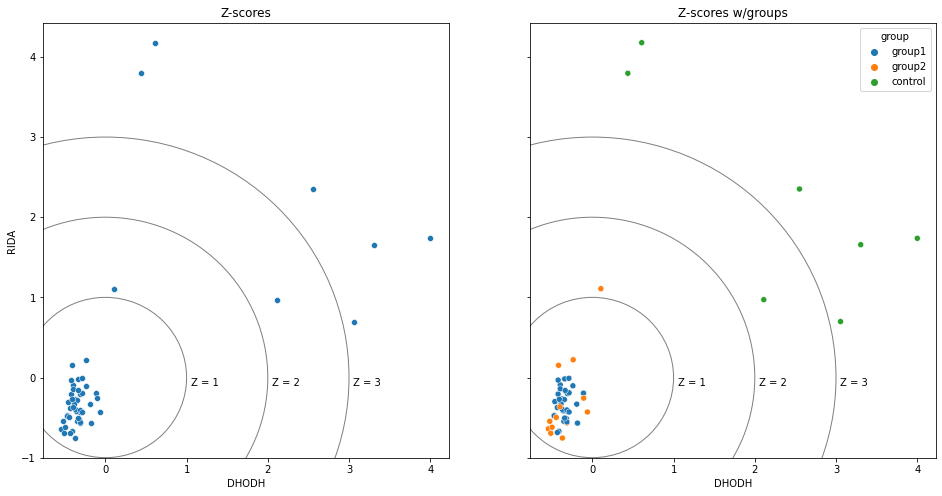

In [33]:
fig,ax=plt.subplots(figsize=(16,8), ncols=2, sharey=True)
ax=ax.flatten()

#z-scores
sb.scatterplot(
    data=pd.DataFrame(
        sp.stats.zscore(imputed_GEX_KNN_metadata[['DHODH','RIDA']].values),
        index=imputed_GEX_KNN_metadata.index, columns=['DHODH','RIDA']
    ).join(imputed_GEX_KNN_metadata['group']),
    x='DHODH', y='RIDA', ax=ax[0]);
#z-scores w/groups
sb.scatterplot(
    data=pd.DataFrame(
        sp.stats.zscore(imputed_GEX_KNN_metadata[['DHODH','RIDA']].values),
        index=imputed_GEX_KNN_metadata.index, columns=['DHODH','RIDA']
    ).join(imputed_GEX_KNN_metadata['group']),
    x='DHODH', y='RIDA', hue='group', ax=ax[1]);
#text labels
for diam in [2,4,6]:
    for axi in [0,1]:
        ax[axi].add_artist(matplotlib.patches.Ellipse((0, 0), diam, diam,edgecolor='gray',facecolor='none'))
        ax[axi].text((diam/2)+0.05, 0, "Z = "+str(int(diam/2)), ha="left", va="top")

# ax[0].title.set_text('Gene expression')
ax[0].title.set_text('Z-scores')
ax[1].title.set_text('Z-scores w/groups')

outlier identification as
$x \notin [Q1 - 1.5 \times IQR, Q3 + 1.5 \times IQR]$
Below we define the regions that would find the inliers (i.e. those within the range above) for the full dataset (black box), as well for each group. Again we see that all control points would be identified as outliers if we considered the entire dataset (black box). Note however the large region defined by the control group (green box).

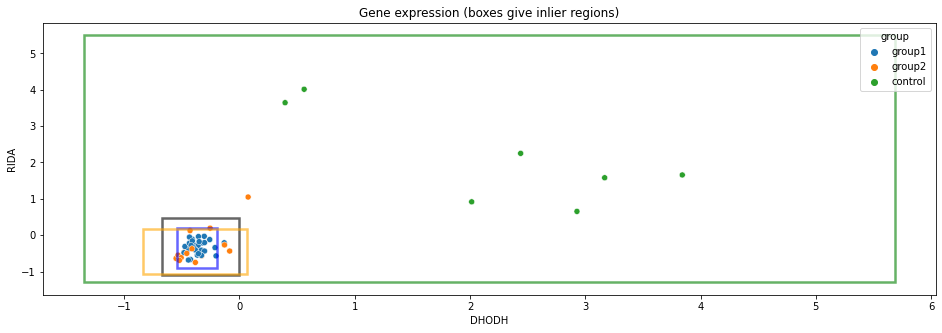

In [34]:
quantile_df=pd.DataFrame(index=['control','group1','group2','full'])
for gene in ['DHODH','RIDA']:
    for quant in [0.25,0.75]:
        quantile_df=quantile_df.join(
            imputed_GEX_KNN_metadata[[gene,'group']].groupby('group')[gene].agg(lambda x: np.quantile(x, quant)).rename(gene+'_'+str(quant)))
        
        quantile_df.loc['full',gene+'_'+str(quant)]=imputed_GEX_KNN_metadata[[gene]].quantile(quant).values
        

quantile_df['DHODH_IQR']=quantile_df['DHODH_0.75']-quantile_df['DHODH_0.25']
quantile_df['RIDA_IQR']=quantile_df['RIDA_0.75']-quantile_df['RIDA_0.25']
quantile_df['DHODH_lower_lim']=quantile_df['DHODH_0.25']-1.5*quantile_df['DHODH_IQR']
quantile_df['RIDA_lower_lim']=quantile_df['RIDA_0.25']-1.5*quantile_df['RIDA_IQR']
quantile_df['DHODH_upper_lim']=quantile_df['DHODH_0.75']+1.5*quantile_df['DHODH_IQR']
quantile_df['RIDA_upper_lim']=quantile_df['RIDA_0.75']+1.5*quantile_df['RIDA_IQR']

fig,ax=plt.subplots(figsize=(16,5))
### IQR of the full dataset
for i in range(4):
    groupi=['full','group1','group2','control'][i]
    ax.add_patch(matplotlib.patches.Rectangle(
        (quantile_df.loc[groupi,'DHODH_lower_lim'], quantile_df.loc[groupi,'RIDA_lower_lim']), 
        quantile_df.loc[groupi,'DHODH_upper_lim']-quantile_df.loc[groupi,'DHODH_lower_lim'], 
        quantile_df.loc[groupi,'RIDA_upper_lim']-quantile_df.loc[groupi,'RIDA_lower_lim'],
        fill=False, color=['k','blue','orange','green'][i], linewidth=2.5, alpha=0.6
    ))
    
#full data
sb.scatterplot(
    data=imputed_GEX_KNN_metadata,
    x='DHODH', y='RIDA', hue='group',  ax=ax);

ax.title.set_text('Gene expression (boxes give inlier regions)')

The above definition of outliers is actually used for identification of outliers when drawing boxplots. In the next figure, we plot the sample values for the two genes. Notice the dots, identified as outliers in each distribution, and the much lower IQR for the full set (gray) than for the control group (green). The outliers identified for the full dataset correspond to those in the control group as we have seen above.

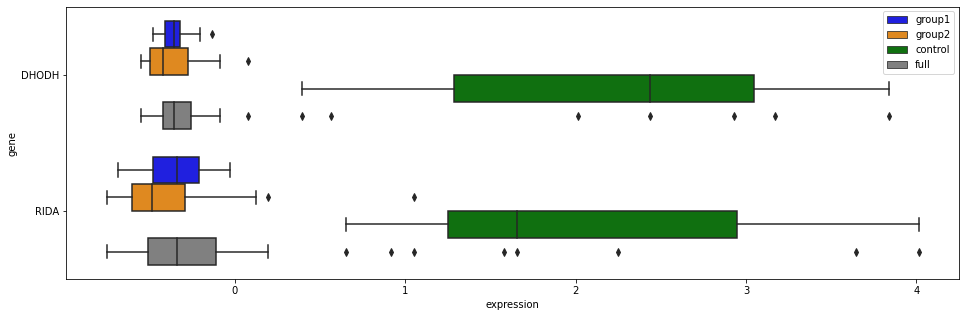

In [35]:
### We create one dummy df so that we can see the distribution of the samples based on the full dataset
full_ds=imputed_GEX_KNN_metadata[['DHODH','RIDA']].unstack().reset_index().rename(columns={'level_0':'gene','level_1':'samples',0:'expression'}).merge(metadata['group'], left_on='samples', right_index=True)
dict_colors={'group1':'blue','group2':'darkorange','control':'green','full':'gray'}
dummy_ds=full_ds.copy()
dummy_ds.loc[:,'group']='full'
full_ds=pd.concat([full_ds, dummy_ds])

fig,ax=plt.subplots(figsize=(16,5))
g=sb.boxplot(data=full_ds,x='expression', y='gene', hue='group', 
             palette=dict_colors)
    
g.legend(loc='center right', bbox_to_anchor=(1, 0.87), ncol=1); #change legend location

However, since we often need to deal with multivariate data, we can have an initial idea of how similar the samples are using pairwise sample correlations based on the entire feature set.

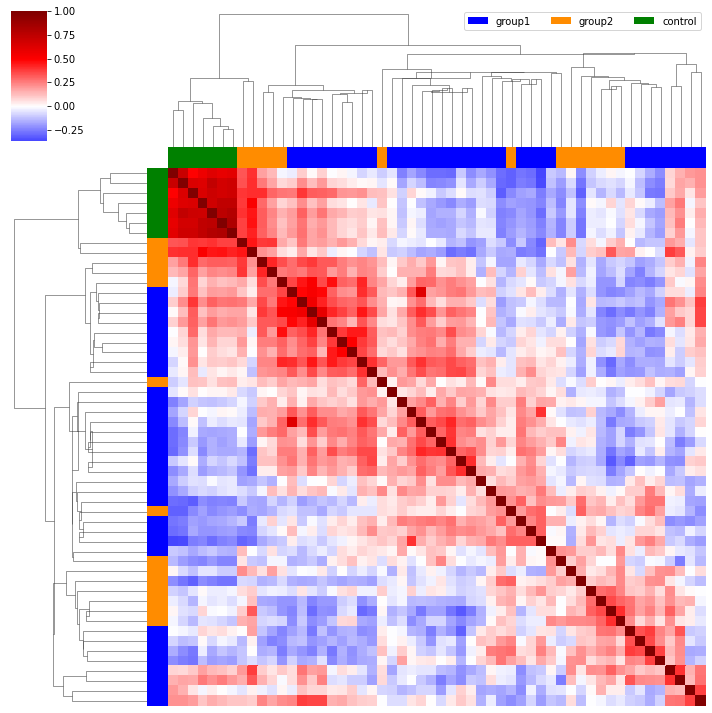

In [36]:
row_order=imputed_GEX_KNN_metadata.sort_values('group').index.values

col_colors=[dict_colors[x] for x in imputed_GEX_KNN_metadata.loc[imputed_GEX_KNN_metadata.sort_values('group').index.values, 'group']]

g=sb.clustermap(
    imputed_GEX_KNN.corr(method='spearman').loc[row_order, row_order],
    row_cluster=True, col_cluster=True,
    metric='euclidean',
    method='centroid',
    row_colors=col_colors, 
    col_colors=col_colors,

    linewidths=0, xticklabels=False, yticklabels=False,
    center=0, cmap='seismic'
)

#legend
for label in imputed_GEX_KNN_metadata['group'].unique():
    g.ax_col_dendrogram.bar(0, 0, color=dict_colors[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="upper right", ncol=6);


In the heatmap above we used Euclidean distance and centroid as linkage method, but what would happen if we used other metrics or linkage methods? You can read more about different distance and linkage metrics here.

Note how the hiearchical clustering shows that control samples are very close to each other, but that a group of samples belonging to group 2 are clustering more closely with the controls than with their respective groups. Can we consider them as outliers? What if looked at sample relationships in 2 dimensions, similarly to how we used 2 random genes above, but instead finding a representation that would explain as much variability in our data as possible as possible?

This is what we will do through principal component analysis. Outliers increase classic measures of variance of a dataset, and given that principal components follow the directions of maximum variance, a PCA is sensitive to outliers. We will further use the first 2 PCs to identify observation distance to model in X-space, or distance to the PCs. This metric briefly takes into consideration each observation's residuals against the model's residuals to compute the amount of variation that is unexplained by the model plane (see this for more information). Observations exceeding the critical distance in DModX (typically 0.05) do not fit the model well and are considered outliers. Other metrics include Hotelling's 𝑇2 method, not examined here.

We will now plot the dataset above based on the first 2 PCs. Note that we have previously standardized the data, and data scaling is crucial for PCA. Scikitlearn has all the necessary tools to perform PCA (example), but to facilitate plotting of different metrics, we use the pca package (which uses scikitlearn on the backend).

In [40]:
## setting group as row labels for plotting
group_labeled_rows=imputed_GEX_KNN_metadata.copy().set_index('group').loc[:, imputed_GEX_KNN_metadata.columns[~imputed_GEX_KNN_metadata.columns.isin(['samples','gender','severity','group'])]]

model=pca(
    n_components=0.95,
    alpha=0.05, # alpha for detecting outliers
    normalize=False #data had been standardized before
)
results=model.fit_transform(group_labeled_rows, verbose=0)


model.scatter();

AttributeError: ignored

Note in the plot above how control samples are clustering very closely, just like most of those in groups 1 and 2. However, a few samples lie far away from most of the population, and they would be identified as outliers if we were to consider the distance to the PCA plane. The following figure highlights the elipse defined by DModX, with outliers now marked as diamonds.

In [ ]:
model.scatter(SPE=True);

In [ ]:
# rerun after dropping the outlier
model=pca(n_components=0.95, alpha=0.05, normalize=False);
results=model.fit_transform(imputed_GEX_KNN.T, verbose=0);

### Outliers with sample labels
outlier_list=results['outliers']
outlier_list=outlier_list.loc[outlier_list.y_bool_spe==True].index.values
print(f'Outlier samples removed:\n\t{outlier_list}')

## Retrieving sample names as outliers 
## and adding them to the `all_outliers` dataframe for later inspection
outliers_ellipse=pd.DataFrame(
    [
        model.results['outliers'].loc[model.results['outliers']['y_bool_spe']==True,].index, 
        np.repeat(['PCA_ellipse'], len(model.results['outliers'].loc[model.results['outliers']['y_bool_spe']==True,].index))
    ], index=['outlier','method']).T

all_outliers=pd.concat([all_outliers, outliers_ellipse])


### only inliers
# setting group as row labels for plotting
inlier_list=imputed_GEX_KNN.copy().columns.values[~imputed_GEX_KNN.columns.isin(outlier_list)]
group_labeled_rows_inliers=imputed_GEX_KNN_metadata.copy().loc[inlier_list].set_index('group').loc[:, imputed_GEX_KNN_metadata.columns[~imputed_GEX_KNN_metadata.columns.isin(['samples','gender','severity','group'])]]

# modeling only on inliers
model=pca( n_components=0.95, alpha=0.05, normalize=False)
results=model.fit_transform(group_labeled_rows_inliers, verbose=0)

model.scatter();

We see above that the top 2 PCs show a much more homogeneous sample distribution after removing the samples identified as outliers. The approaches 
above assume normally-distributed data, which is not always the case.

## HDBSCAN

The Density-Based Clustering Based on Hierarchical Density Estimates (HDBSCAN) is an extension to DBSCAN (demo). Briefly, this clustering method identifies clusters based on areas with high density of observations, sepparated by areas with low density, and extracts clusters based on their stability. To do so, this algorithm uses the minimum sample and minimum cluster size hyperparameters, together with sample distance metrics, to identify core points (those at the center of a cluster), border points (those near the border of a cluster), and noise points (those not belonging to a cluster, and considered as anomalies). More information and demonstration of how HDBSCAN works can be found in here. There is some hyperparameter tuning to be done that we will not cover here.

Let's examine how the outlier scores when setting the minimum size of a cluster to 2 or 4.

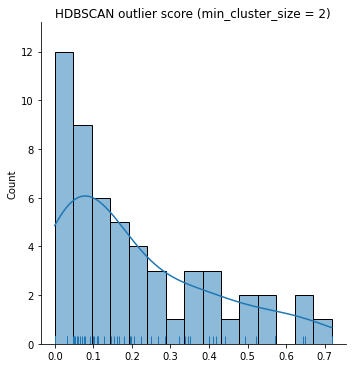

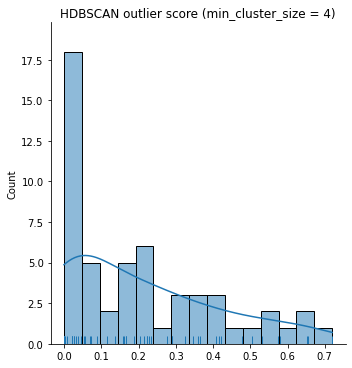

In [41]:
for min_clust in [2,4]:
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_clust).fit(imputed_GEX_KNN.T)
    sb.displot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True, kde=True, bins=15)
    plt.title('HDBSCAN outlier score (min_cluster_size = '+str(min_clust)+')');

Note how increasing min_cluster_size leads to a higher number of points with lower outlier scores. We will consider that min_cluster_size = 4 based on the sample similarity that we computed above (through KNN in the Imputation section). In the next cell we explore different quantile thresholds for identifying outliers.

In [42]:
for quantile_val in [0.7, 0.95]:
    clusterer = hdbscan.HDBSCAN(min_cluster_size=4).fit(imputed_GEX_KNN.T)
    threshold = pd.Series(clusterer.outlier_scores_).quantile(quantile_val)
    outliers = np.where(clusterer.outlier_scores_ > threshold)[0]
    print(f'Quantile: {quantile_val}   | Number of outliers: {len(outliers)}')
    
    
    ## setting group as row labels for plotting
    outlier_labeled_rows=imputed_GEX_KNN_metadata.copy().loc[:, imputed_GEX_KNN_metadata.columns[~imputed_GEX_KNN_metadata.columns.isin(['samples','gender','severity'])]]
    
    # adding outliers to summary table
    outlier_list=[outlier_labeled_rows.index[x] for x in range(outlier_labeled_rows.shape[0]) if (x in outliers)]
    all_outliers=pd.concat([all_outliers,
                            pd.DataFrame([outlier_list, np.repeat('Quantile_'+str(quantile_val),len(outlier_list))], index=['outlier','method']).T])

    # label outliers
    outlier_labeled_rows.set_index('group', inplace=True)
    outlier_labeled_rows.index=[outlier_labeled_rows.index[x] if (x not in outliers) else 'outlier' for x in range(outlier_labeled_rows.shape[0])]
    
    
    model=pca(n_components=0.95, normalize=False)
    results=model.fit_transform(outlier_labeled_rows, verbose=0)
    model.scatter(cmap='tab20');

Quantile: 0.7   | Number of outliers: 16


TypeError: ignored

Note in the 1st PCA above (quantile 0.7) that sparse samples tend to be identified as outliers, but those similar in the 2 PC-space are not labeled as outliers. When considering as outliers those points above the 95% quantile, we still see that points identified as outliers are those 3 group1/group2 samples that show the highest sparsity.
We have not explored other hyperparameters of HDBSCAN such as min_samples (the number of samples in a neighborhood, controls how tolerant the algorithm is to noise), metric (the distance metric), or cluster_selection_epsilon (the distance threshold for merging clusters). You can explore how these parameters influence clustering in here.

##Local Outlier Factor

The Local Outlier Factor (LOF) is a method with some commonalities to DBSCAN. LOF also seeks to compare density with respect to a given sample and compare it with the densities of samples in its neighbours, to determine which samples have a lower density compared to their neighbors, and as such should be considered as outlier. In this method, the "local density" is estimated based on the number of samples in a given neighborhood, and depends on the hyperparameter n_neighbors.

Below, we also consider euclidean distance as metric, and set outliers to represent 5% of the samples.

In [44]:
def LOF_PCA(n_neighbor, contamination, pc1=0, pc2=1):
    """
    A function to perform LOF and represent the resulting outliers in PCA space (PC1 vs PC2)
    """
    LOF=sklearn.neighbors.LocalOutlierFactor(
        n_neighbors=n_neighbor,
        metric='euclidean',
        n_jobs=-1,
        contamination=contamination #fraction of samples to consider as outliers
    )
    results=LOF.fit(imputed_GEX_KNN.T)
    outliers=np.where(results.fit_predict(imputed_GEX_KNN.T) == -1)[0]

    print(f'n_neighbors: {n_neighbor} | outlier fraction: {contamination} | Number of outliers: {len(outliers)}')
    
        
    ## setting group as row labels for plotting
    outlier_labeled_rows=imputed_GEX_KNN_metadata.copy().loc[:, imputed_GEX_KNN_metadata.columns[~imputed_GEX_KNN_metadata.columns.isin(['samples','gender','severity'])]]
    
    # adding outliers to summary table
    outlier_list=[outlier_labeled_rows.index[x] for x in range(outlier_labeled_rows.shape[0]) if (x in outliers)]
    outlier_df=pd.DataFrame([outlier_list, np.repeat('LOF_contamination'+str(contamination)+'_k'+str(n_neighbor),len(outlier_list))], index=['outlier','method']).T
    
    # label outliers
    outlier_labeled_rows.set_index('group', inplace=True)
    outlier_labeled_rows.index=[outlier_labeled_rows.index[x] if (x not in outliers) else 'outlier' for x in range(outlier_labeled_rows.shape[0])]

    model=pca(n_components=0.95, normalize=False)
    results=model.fit_transform(outlier_labeled_rows, verbose=0)
    model.scatter(cmap='tab20', PC=[pc1,pc2])
    
    return(outlier_df)
    
# we plot and add the list of outliers to the summary DF
all_outliers=pd.concat([all_outliers, LOF_PCA(n_neighbor=4, contamination=0.05)])

n_neighbors: 4 | outlier fraction: 0.05 | Number of outliers: 3


TypeError: ignored

Curiously, the first two plots further define a point in the center as outlier. Can you hypothesize why? (hint: pc3 and pc4)
If we increased the outlier ratio to 30%, we would see that the most sparse points at the top 2 PCs are identified as outliers.

In [45]:
all_outliers=pd.concat([all_outliers, LOF_PCA(n_neighbor=4, contamination=0.3)])

n_neighbors: 4 | outlier fraction: 0.3 | Number of outliers: 16


TypeError: ignored

In [46]:
LOF_PCA(n_neighbor=4, contamination=0.3, pc1=4, pc2=3);


n_neighbors: 4 | outlier fraction: 0.3 | Number of outliers: 16


TypeError: ignored

UMAP may be used for outlier detection as shown here, where the embedding is used to improve the detection through LOF.

**Isolation Forest and One-class SVMs**

We will finish the outlier detection by briefly showing how you can apply two approaches for non-linear outlier detection based on multivariate data: Isolation Forest and One-class SVMs.

The methods in the previous sections look for normal data, and then identifies the data points that do not conform to the normal population distribution. Isolation Forests (IF) instead isolates anomalies instead of profiling normal data, and seems to perform quite well in large and multidimensional datasets, both in saving computational resources and in detection performance. This ensemble tree approach considers that anomalies constitute a minor fraction of the data, whose attributes are markedly different from the rest of the population. Anomalies will tend to lie isolated from the rest of the population as single points near the root of the tree, as opposed to the rest of the population which tends to be near the deeper end of the tree. This method borrows from Binary Search Trees in using the average path length on a tree to find anomalies without requiring computation of sample-sample distances (more information in the original article or in the scikitlearn guidelines).

IF is a method that works very well in large sample sizes, but because of our small sample size we will consider all samples in all trees (max_samples = auto as min(256, n_samples)).

In [47]:
def IF_PCA(contamination='auto', pc1=0, pc2=1):
    """
    A function to perform Isolation Forest and represent the resulting outliers in PCA space (PC1 vs PC2)
    """
    IF_clf=IsolationForest(
        max_samples='auto',
        contamination=contamination,
        random_state=99,
        n_jobs=-1
    )
    results=IF_clf.fit_predict(imputed_GEX_KNN.T)
    outliers=np.where(results == -1)[0]
    
    print(f'outlier fraction: {contamination} | Number of outliers: {len(outliers)}')
    
    ## setting group as row labels for plotting
    outlier_labeled_rows=imputed_GEX_KNN_metadata.copy().loc[:, imputed_GEX_KNN_metadata.columns[~imputed_GEX_KNN_metadata.columns.isin(['samples','gender','severity'])]]
    
    # adding outliers to summary table
    outlier_list=[outlier_labeled_rows.index[x] for x in range(outlier_labeled_rows.shape[0]) if (x in outliers)]
    outlier_df=pd.DataFrame([outlier_list, np.repeat('IF',len(outlier_list))], index=['outlier','method']).T
    
    
    # label outliers
    outlier_labeled_rows.set_index('group', inplace=True)
    outlier_labeled_rows.index=[outlier_labeled_rows.index[x] if (x not in outliers) else 'outlier' for x in range(outlier_labeled_rows.shape[0])]
    
    # PCA
    model=pca(n_components=0.95, normalize=False)
    results=model.fit_transform(outlier_labeled_rows, verbose=0)
    model.scatter(cmap='tab20', PC=[pc1,pc2]);
    return(outlier_df)
    
all_outliers=pd.concat([all_outliers, IF_PCA(pc1=0, pc2=1)])

outlier fraction: auto | Number of outliers: 3


TypeError: ignored

We observe that the 3 samples identified as outliers are very distant from most of the population. Some degree of randomness will occur depending on the random_state specified above, as expected from ensemble-based methods.

A final example that one may consider in non-gaussian data is one-class SVM, a method with some similarity with KNN but that does not imply prior identification of cluster number. It looks for the majority class (inliers) and classifies the extremes as outliers. This is an unsupervised approach that can be tuned to approximate the ratio of outliers in the data through the parameter nu, as it will give the fraction of training errors. This parameter requires tuning, and corresponds to the probability of finding an observation outside the frontier, and is known as the margin. We will use the default non-linear kernel rbf (though you may experiment with other kernels).

In [48]:
def SVM_PCA(nu=0.1, pc1=0, pc2=1):
    """
    A function to perform One-class SVM and represent the resulting outliers in PCA space (PC1 vs PC2)
    """
    SVM_clf=OneClassSVM(
        gamma='scale', 
        nu=nu     #fraction of training errors
    )
    results=SVM_clf.fit_predict(imputed_GEX_KNN.T)
    outliers=np.where(results == -1)[0]
    
    print(f'nu: {nu} | Number of outliers: {len(outliers)}')
    
    ## setting group as row labels for plotting
    outlier_labeled_rows=imputed_GEX_KNN_metadata.loc[:, imputed_GEX_KNN_metadata.columns[~imputed_GEX_KNN_metadata.copy().columns.isin(['samples','gender','severity'])]]
    
    # adding outliers to summary table
    outlier_list=[outlier_labeled_rows.index[x] for x in range(outlier_labeled_rows.shape[0]) if (x in outliers)]
    outlier_df=pd.DataFrame([outlier_list, np.repeat('SVM_nu'+str(nu),len(outlier_list))], index=['outlier','method']).T
    
    
    # label outliers
    outlier_labeled_rows.set_index('group', inplace=True)
    outlier_labeled_rows.index=[outlier_labeled_rows.index[x] if (x not in outliers) else 'outlier' for x in range(outlier_labeled_rows.shape[0])]
    
    
    # PCA
    model=pca(n_components=0.95, normalize=False)
    results=model.fit_transform(outlier_labeled_rows, verbose=0)
    model.scatter(cmap='tab20', PC=[pc1,pc2]);
    
    return(outlier_df)
    
all_outliers=pd.concat([all_outliers, SVM_PCA(pc1=0, pc2=1)])

nu: 0.1 | Number of outliers: 9


TypeError: ignored

Note however that our dataset is extremely small for these approaches, and we should ideally split training and testing sets in order to compute F-scores and identify the best suited hyperparameter tuning. As an exercise, you can test this and which samples are consistently identified as outliers in each of these two cases for instances by considering KFold repetition and adapting it above:

{pythoon}
X=imputed_GEX_KNN_metadata.loc[:,~imputed_GEX_KNN_metadata.columns.isin(['samples','group','gender','severity'])]
y=imputed_GEX_KNN_metadata['group']

rskf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
for train_index, test_index in rskf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [49]:
summary_outliers=pd.get_dummies(all_outliers.set_index('outlier')['method']).max(level=0)
summary_outliers['row_total']=summary_outliers.sum(1)
summary_outliers.sort_values('row_total', ascending=False, inplace=True)

# returning the results where total>2
summary_outliers=summary_outliers.loc[summary_outliers.row_total>2, ]
summary_outliers

,Quantile_0.7,row_total
outlier,,


We observe that LOF, PCA ellipse and quantile detection tend to identify the same samples as outliers, which is expected given the linear nature of these methods. It is interesting to see that IF tends to also detect those same samples, but that SVM tends to miss them. Perhaps the results would be different if we had performed the crossvalidation on IF and SVM.
One should also question why those samples specifically are flagged as outliers. For instance, do those samples tend to show any technical biases such as higher number of reads, or do they come from patients with specific phenotypes?

For the next section, we will drop the following samples from further analysis: sample_10.g1, sample_42.g2, sample_43.g2 and sample_36.g2.

In [50]:
samples_to_drop=['sample_10.g1','sample_42.g2','sample_43.g2','sample_36.g2']
imputed_GEX_KNN_metadata_cleaned=imputed_GEX_KNN_metadata.copy().loc[~imputed_GEX_KNN_metadata.index.isin(samples_to_drop),]

imputed_KNN_raw=imputed_KNN_raw.copy().loc[~imputed_KNN_raw.index.isin(samples_to_drop),]

## data profiling
Before going deeper into downstream analyses, we can perform some initial checks on our data to get a feeling to potential issues and feature relationships. We can use:

- DABL - Data Analysis Baseline Library - quick data overview and inspection

- Pandas profiling - more in-depth column (feature) focused data overview

- Detection of technical bias in low dimensions - we look at how we can use UMAP and PCA in finding technical biases

Note that while these tools can give us some initial idea of potential technical artifacts or relationships in the data, we should dig deeper before removing data or using any of the proposed models for hypothesis generation.

## DABL

DABL can help us perform some of the initial data cleaning and assessment. For instance, have a look at initial detection of "useless" features (which include Anything that is constant, nearly constant, detected as an integer index, or that doesn't match other common data types).

In [51]:
temp=dabl.detect_types(imputed_GEX_KNN_metadata_cleaned)
temp

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
OR1S1,False,False,False,False,False,False,True
DEFB115,False,False,False,False,False,False,True
OR2B3,False,False,False,False,False,False,True
OR5H15,False,False,False,False,False,False,True
DAZ2,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
NUBP1,True,False,False,False,False,False,False
samples,False,False,False,False,False,True,False
group,False,False,False,True,False,False,False
gender,False,False,False,True,False,False,False


This readily warns us that a potential issue with some of the variables deemed "useless", for instance based on the low cardinality of the data. We will discard those columns here, but ideally we should examine these further to ensure that we are not blindly removing important features.

We can use DABL to perform some initial data cleaning too (dabl.clean()), but we will skip it for now.


In [52]:
#dropping columns
data_cleaned=imputed_GEX_KNN_metadata_cleaned.loc[:,temp.index[temp.useless==False]]

dabl.clean(imputed_GEX_KNN_metadata_cleaned, verbose=1).head() #not used any further

Detected feature types:
continuous      4703
dirty_float        0
low_card_int       0
categorical        2
date               0
free_string        1
useless           65
dtype: int64


,OR5M1,MYL1,MYLPF,CTRB2,CTRB1,MYOD1,KLHL40,MB,MYOG,PRSS1,MYL2,TNNT3,CELA3B,REG3G,CAV3,SYCN,ACTC1,SMYD1,TNNC2,PRLHR,MYH7,NLRP7,GP2,ESX1,OR51S1,CACNG1,CELA3A,ASB5,PNLIPRP1,MAGEB1,LRRC38,MMP27,CPB1,ATP1B4,CKM,OR51D1,HSPB3,NKX2-2,LIN28A,SERPINI2,...,DUSP4,RTN4RL1,GATA5,RAET1E,CELF6,ARL4C,TNF,CRACR2A,PRKG1,CSF3R,KIF15,NOTCH3,PRKDC,GPR37,CERKL,IL21R,ARHGAP11A,AGER,SLCO3A1,DBF4,HRASLS2,ATP2A3,TUB,MYCBPAP,LYPD3,TOR1B,SNAP29,MRPS25,NUMB,BCL2L13,DNAJB12,RMDN3,TXNDC11,ABCF3,NDUFB4,NUBP1,samples,group,gender,severity
sample_1.g1,-0.142857,-0.144353,-0.138819,-0.144892,-0.147888,-0.140526,-0.143347,-0.142016,-0.143215,-0.147918,-0.141934,-0.144978,-0.142397,-0.149920,-0.149644,-0.145366,-0.139827,-0.146327,-0.142218,-0.146248,-0.145976,-0.619215,-0.145696,-0.145901,-0.144664,-0.146839,-0.385488,-0.146502,-0.146865,-0.226218,-0.149156,-0.147462,-0.148493,-0.14812,-0.151725,-0.150116,-0.145147,-0.146445,-0.336583,-0.149930,...,-0.873040,-0.213323,0.121825,-0.459272,0.217366,-1.103527,-0.806689,-0.552123,-0.781442,-0.455977,-0.232778,-0.905881,-0.441684,-0.603291,-0.839844,-0.386176,-0.342405,0.102685,-0.760740,0.073720,-0.419412,-0.855095,-0.546624,-0.702011,-0.454518,0.422327,0.611983,2.271612,1.187216,0.976158,0.539282,0.466522,1.116271,0.421869,-0.147008,-0.282622,sample_1,group1,Male,2.0
sample_11.g1,-0.142857,-0.144353,-0.138460,-0.144690,-0.147888,-0.140526,-0.143347,-0.141948,-0.143215,-0.144350,-0.141934,-0.144784,-0.142627,-0.149680,-0.146219,-0.145366,-0.139418,-0.144329,-0.141852,-0.146248,-0.141694,0.899052,-0.145547,-0.125936,-0.144664,-0.141386,-0.314636,-0.148864,-0.138488,-0.226218,-0.149156,-0.146487,-0.144779,-0.14812,-0.151408,-0.150116,-0.145147,-0.146445,-0.120035,-0.149930,...,-0.450335,0.163485,-0.921627,-0.963967,-0.554091,-0.258202,-0.385476,0.082576,-0.608226,-0.693421,0.733278,-0.553516,1.625647,4.246882,-0.204572,-0.899731,0.386690,-0.667373,-0.650118,-0.063906,-0.540582,-0.671410,-0.160788,0.738864,1.542643,0.677027,-0.611648,-0.606829,0.892590,-0.526435,1.595284,-1.095167,-0.655772,0.335495,-1.431947,1.067429,sample_11,group1,Female,2.0
sample_12.g1,-0.142857,-0.144353,-0.138819,-0.144892,-0.147888,-0.140526,-0.143347,-0.142016,-0.141695,-0.147918,-0.141934,-0.144754,-0.140985,-0.150124,-0.150032,-0.145366,-0.139784,-0.142831,-0.142282,-0.145366,-0.145976,-0.585476,-0.145696,-0.145901,-0.144664,-0.146839,-0.290647,-0.148864,-0.146865,-0.226218,-0.149156,-0.147462,-0.151138,-0.14812,-0.116888,-0.150116,-0.145147,-0.146445,2.296919,-0.149930,...,1.957635,-0.352351,-0.435380,-0.963967,-0.557597,0.211146,-0.806689,1.215409,-0.232177,0.346317,2.129975,0.770649,2.285381,0.101395,-0.420069,-0.820722,2.429504,-0.624365,-0.199528,2.127001,-0.921400,-0.406795,0.528546,-0.165615,0.871633,-0.833196,-1.427159,0.864167,1.512624,0.355916,-0.271748,0.497581,-2.146976,0.036922,-0.288053,-0.013110,sample_12,group1,Male,3.0
sample_13.g1,1.642857,-0.144353,-0.138626,-0.144892,-0.147888,-0.140526,-0.143347,-0.142016,-0.143215,-0.147918,-0.141934,-0.144554,-0.141625,-0.149717,-0.150032,-0.145366,-0.129671,-0.146327,-0.140910,-0.146248,-0.144859,-0.602345,-0.145696,-0.145901,-0.144664,-0.142188,-0.198038,-0.147446,-0.145668,-0.226218,-0.149156,-0.118706,-0.144287,-0.14812,-0.151661,-0.150116,-0.141433,-0.146445,-0.371510,-0.148064,...,-0.678849,-0.863540,0.210709,-0.373654,-0.213764,-0.228768,-0.881021,-0.781031,-0.677333,0.388960,0.821871,-0.714092,-0.341725,-0.177113,0.857956,-0.522246,0.153129,0.452897,-0.477492,1.108523,1.311578,-0.395377,-0.607898,-0.488082,0.273164,-0.275253,0.210400,1.042810,-0.892130,0.426851,1.314020,1.341871,1.337650,-0.525145,0.651674,3.085383,sample_13,group1,Female,2.0
sample_14.g1,-0.142857,-0.144353,-0.138716,-0.144882,-0.147888,-0.140526,-0.143347,-0.142016,-0.143215,-0.147877,-0.141934,-0.144897,-0.142302,-0.150054,-0.149256,-0.145366,-0.139740,-0.146327,-0.141685,-0.146248,-0.145417,-0.011908,-0.145670,-0.145901,-0.144664,-0.135292,-0.247132,-0.145557,-0.142762,-0.226218,-0.149156,-0.147462,-0.144533

We can perform some initial exploratory analyses and comparisons at feature level with respect to the groups in our data. Below, notice the LDA based on the top 10 features selected based on sample classification. Further, it also performs initial feature correlation and PCA.

/usr/local/lib/python3.7/dist-packages/dabl/plot/supervised.py:547: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)


Target looks like classification
Showing only top 10 of 4703 continuous features
Linear Discriminant Analysis training set score: 0.858


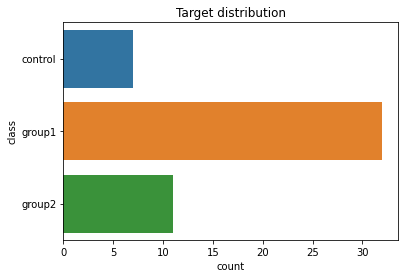

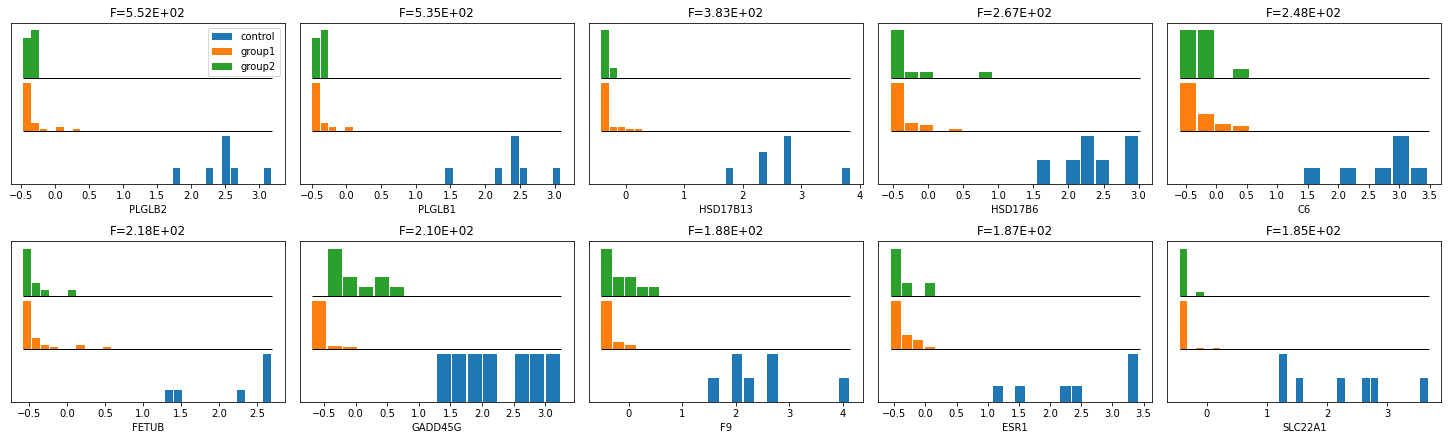

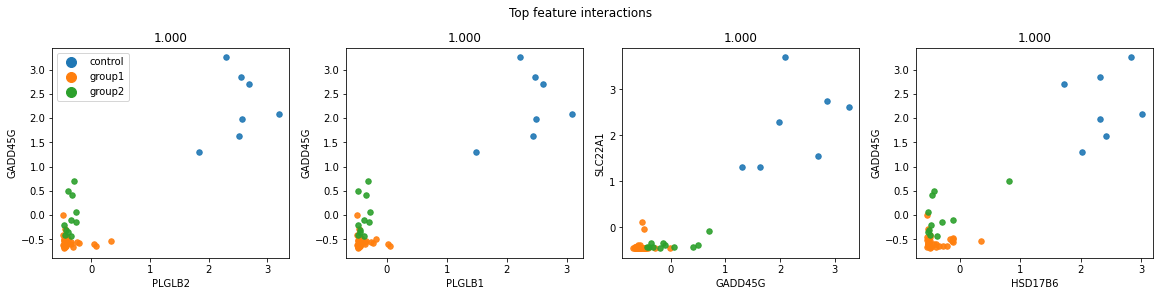

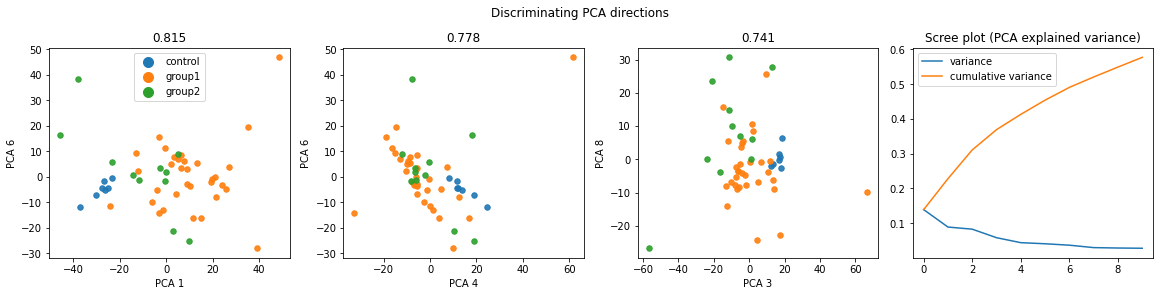

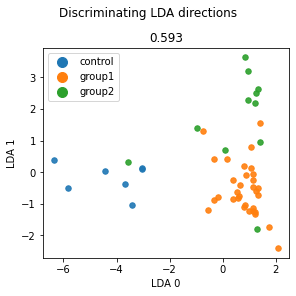

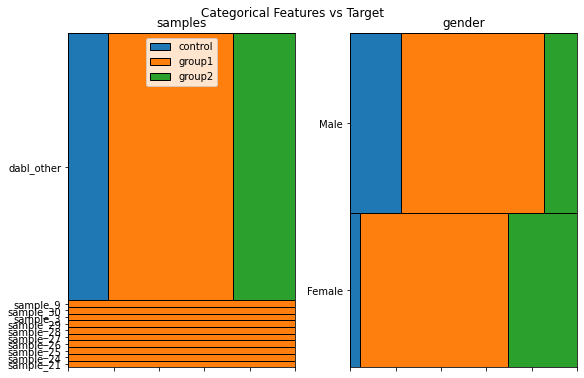

In [53]:
## suggesting data types 
data_types={x : ('continuous' if x not in ['samples','group','gender'] else 'categorical') for x in data_cleaned.columns  }

dabl.plot(data_cleaned, y='group', type_hints=data_types)

In [54]:
model_build=dabl.SimpleClassifier(random_state=42).fit(data_cleaned.loc[:,~data_cleaned.columns.isin(['gender','severity'])], target_col='group')

Running DummyClassifier()
accuracy: 0.640 recall_macro: 0.333 precision_macro: 0.213 f1_macro: 0.260
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.640 recall_macro: 0.333 precision_macro: 0.213 f1_macro: 0.260

Running GaussianNB()
accuracy: 0.680 recall_macro: 0.570 precision_macro: 0.564 f1_macro: 0.550
=== new best GaussianNB() (using recall_macro):
accuracy: 0.680 recall_macro: 0.570 precision_macro: 0.564 f1_macro: 0.550

Running MultinomialNB()
accuracy: 0.800 recall_macro: 0.770 precision_macro: 0.720 f1_macro: 0.728
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.800 recall_macro: 0.770 precision_macro: 0.720 f1_macro: 0.728

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.760 recall_macro: 0.633 precision_macro: 0.576 f1_macro: 0.592
Running DecisionTreeClassifier(class_weight='balanced', max_depth=5)
accuracy: 0.800 recall_macro: 0.805 precision_macro: 0.828 f1_macro: 0.788
=== new best DecisionTreeClassifier(

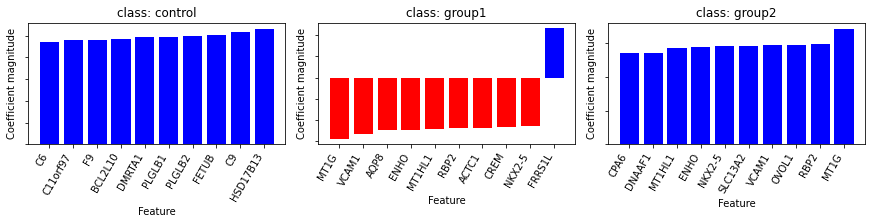

In [55]:
dabl.explain(model_build)


## Pandas profiling
This package computes some initial mmetrics of the data focusing on the columns (features), outputing the results into different plots. For instance, it automatically computes the data missingness and duplication, and tests whether columns are numeric or categorical (columns with <5 unique values are considered categorical). We will test in here for a random set of 20 features. Things to watch:
- missingness

- data duplication

- feature correlation

- zeros or infinite numbers

- other data artifacts in top/bottom rows

In [56]:
test=imputed_GEX_KNN_metadata_cleaned.copy().sample(20, axis=1)

test.reset_index(inplace=True, drop=True)

profile=pandas_profiling.ProfileReport(test, minimal=False, explorative=True)

profile.to_notebook_iframe()

###### To output to HTML, uncomment the following lines:
profile.set_variable("html.minify_html", False)
profile.to_file("output.html")

TypeError: ignored

## Detection of technical bias in low dimensions
We can use UMAP and PCA as a way to visualize sample projections in low dimensional space, and flag for potential issues - we could also consider metric or nonmetric MDS. We apply both UMAP and PCA as they are respectively non-linear and linear dimensionality reduction approaches, and thus may assist us in finding different issues with the data. We will not work on tuning the hyperparameters for UMAP (min_dist and k), but this is something that you should always do.

Ideally, we should examine the relationship between any potential confound factors and sample distributions in low dimensional space. For instance, were our samples sequenced in batches or collected at different time points? If so, we should examine whether there is a relationship between PC coordinates and each of the covariates. This problem can be examined from many different perspectives, depending on the nature of our covariate. We can examine the relationship between latent-variables and covariates, for instance by applying:

- ANOVA or Kruskal-Wallis for categorical covariates.

- Regression for continuous covariates.

Note that each method has its own assumptions, which we will not address here. Below, we will define the functions to compute PCA/UMAP projections, visualize them, and test dependence with Kruskal-Wallis and regression.

In [57]:
def umap_compute(data_input, labels, n_neighbors=4, min_dist=0.5, metric='euclidean'):
    """
    Computes UMAP coordinates and visualizes it.  Labels are only used to name index.
    
    data_input: numeric
    labels: series
    """
    fit = umap.UMAP(
        n_components=10, 
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric=metric, 
        random_state=42        
    )
    u = pd.DataFrame(fit.fit_transform(data_input), index=labels, columns=['UMAP'+str(i+1) for i in range(10)])
    return(u)

def umap_visualize(umap_df, labels, umap1='UMAP1', umap2='UMAP2'):
    """
    Projects UMAP coordinates.
    umap_df: numeric
    labels: series
    """
    dat=umap_df
    dat.index=labels
    fig,ax=plt.subplots(figsize=(4,4))
    sb.scatterplot(
        data=umap_df,
        x=umap1, y=umap2, hue=dat.index,
    );

    ax.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
    ax.set_title('UMAP '+labels.name)
    
def pca_compute(data_input, labels):
    """
    Computes PCA coordinates. Data is not normalized prior to PCA.
    
    data_input: numeric
    labels: series
    """
    temp=data_input
    temp.index=labels
        
    model=pca(n_components=10, normalize=False) #here we use 10 PCs for simplicity sake
    results=model.fit_transform(temp, verbose=0)['PC']
    return(results)
    
def pca_visualize(pca_df, labels):
    """
    Projects PCA coordinates. Labels are only used to name index.
    
    pca_df: numeric
    labels: series
    """
    dat=pca_df
    dat.index=labels
    fig,ax=plt.subplots(figsize=(4,4))
    sb.scatterplot(
        data=pca_df,
        x='PC1', y='PC2', hue=dat.index,
    );

    ax.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
    ax.set_title('PCA '+labels.name)
    
def latent_space_stat(input_df, labels):
    """
    Tests relationship between latent-space coordinates and covariates. 
    
    input_df: numeric df from PCA or UMAP
    labels: series, may be categorical or continuous. Replace the index in input_df
    
    For continuous variable, it uses Spearman correlation. For categorical, Kruskal-Wallis.
    """
    # find if data is categorical or continuous
    if(all([type(x)==float for x in labels])):
        print('Found continuous covariate: '+labels.name)
        lab_type='cont'
        
        # if NA, throw warning
        if(any(np.isnan(labels))):
           warnings.warn('NA detected in labels.')
    elif(all([type(x)==str for x in labels])):
        print('Found categorical covariate: '+labels.name)
        lab_type='cat'
    else:
        print('Unable to identify covariate type for '+labels.name+'. Considering as categorical.')
        lab_type='cat'
    
    input_df.index=labels    

    all_stats=pd.DataFrame()
    if(lab_type=='cont'):
        for lat_dim in input_df.columns:
            r,p=sp.stats.spearmanr(input_df[lat_dim].values, labels.values, nan_policy='omit')
            out=pd.Series([lat_dim,labels.name,r,p,'Spearman'])
            all_stats=pd.concat([all_stats,out],1)
            
    else:
        temp=input_df.copy().reset_index().groupby(labels.name).agg(list).T
        for lat_dim in temp.index:            
            args = [temp.loc[lat_dim, col] for col in temp.columns]
            H,p=sp.stats.mstats.kruskalwallis(*args)
            out=pd.Series([lat_dim, labels.name, H, p, 'Kruskal_Wallis'])
            all_stats=pd.concat([all_stats,out],1)
        
    all_stats=all_stats.T.reset_index(drop=True).rename(columns={0:'latent_dim',1:'covariate',2:'Stat',3:'P',4:'test'})
    all_stats['Q']=multitest.fdrcorrection(all_stats['P'])[1]

    return(all_stats)

Found categorical covariate: group
Found categorical covariate: gender
Found continuous covariate: severity


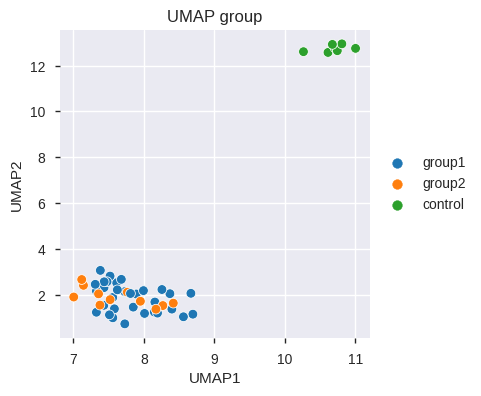

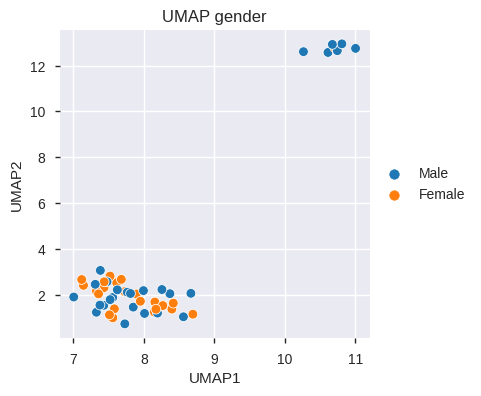

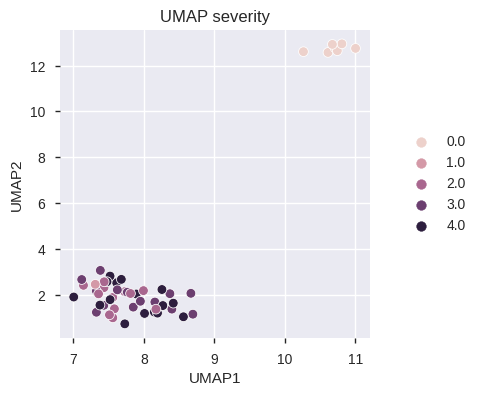

In [59]:
### sepparating data from labels
X=imputed_GEX_KNN_metadata_cleaned.loc[:,~imputed_GEX_KNN_metadata_cleaned.columns.isin(['group','gender','samples','severity'])]
y=imputed_GEX_KNN_metadata_cleaned[['gender','samples','severity','group']]

## Control samples have no severity value, so we encode this as 0 below.
y=y.copy().fillna(0)

## projections
#pca_projection=pca_compute(X, y['group']) #labels are only used to label index
umap_projection=umap_compute(X, y['group']) #labels are only used to label index

covariate_tests=pd.DataFrame()
for var in ['group','gender','severity']:
    ## visualization
    #pca_visualize(pca_projection,y[var])
    umap_visualize(umap_projection,y[var])
    
    ## collecting stats
    #covar_testing=latent_space_stat(pca_projection, y[var])
    #covar_testing['dim_reduction']='PCA'
    #covariate_tests=pd.concat([covariate_tests, covar_testing])

    covar_testing=latent_space_stat(umap_projection, y[var])
    covar_testing['dim_reduction']='UMAP'
    covariate_tests=pd.concat([covariate_tests, covar_testing])#

The above plots show that there is no particular clustering in terms of gender or severity, at least when considering the 2 first dimensions. We do see some differences in terms of group, where controls cluster together (which is also why samples with severity=0 are together).
If we want to perform more systematic analyses, we can examine whether and how covariates associate with latent coordinates. Though severity is a categorical variable, we will treat it as continuous in this example.

In [ ]:
## getting stats and converting long to wide dfs
pca_covariate_testing=covariate_tests.loc[covariate_tests.dim_reduction=='PCA',['latent_dim','covariate','Q']].pivot(columns='covariate',values='Q',index='latent_dim')

umap_covariate_testing=covariate_tests.loc[covariate_tests.dim_reduction=='UMAP',['latent_dim','covariate','Q']].pivot(columns='covariate',values='Q',index='latent_dim')

## sorting indices
sorted_index=pca_covariate_testing.index.to_series().str.replace('PC','').astype(int).sort_values().index
pca_covariate_testing=pca_covariate_testing.loc[sorted_index,]

sorted_index2=umap_covariate_testing.index.to_series().str.replace('UMAP','').astype(int).sort_values().index
umap_covariate_testing=umap_covariate_testing.loc[sorted_index2,]

## converting cols to numeric for plotting
for col in umap_covariate_testing.columns:
    pca_covariate_testing[col]=pd.to_numeric(pca_covariate_testing[col])
    umap_covariate_testing[col]=pd.to_numeric(umap_covariate_testing[col])

umap_covariate_testing=np.log10(umap_covariate_testing)
pca_covariate_testing=np.log10(pca_covariate_testing)

## heatmaps
fig,ax=plt.subplots(ncols=2, figsize=(14,6))
ax=ax.flatten()
sb.heatmap(
    umap_covariate_testing,
    vmax=-1.3,vmin=-5,
    cmap = "gray",
    ax=ax[0],
    cbar=False
);
ax[0].set_title('UMAP');
sb.heatmap(
    pca_covariate_testing,
    vmax=-1.3,vmin=-5,
    cmap = "gray",
    ax=ax[1],
    cbar_kws={'label': 'Log10 (Q)'}
);
ax[1].set(ylabel='')
ax[1].set_title('PCA');
fig.tight_layout()

## data transformation

Data scaling, normalization or standardization are different techniques often necessary for downstream analysis. If your samples have different scales of measurement, the application of regression-based algorithms, KNN, SVM, LDA, PCA and other downstream analyses may end up modeling these biases rather than the biological variability in your data. Many methods assume that the magnitude of a biological effect is proportional to its importance in all samples, and that the level of noise is similar in all variables. However, this is not always true, and some samples may contain more noise than others.
For these reasons, it is usually a good idea to rescale your data, but by doing so you should bear in mind that you may also be removing important biological variation that should be kept. Should you transform your data and how? This depends on different issues, including how your data was generated, whether you are trying to correct any batch effects, and which methods you will apply downstream. Please refer to this discussion for more information as to whether or not you should normalize your data.
Here we will see:
- scaling

- standardization

- quantile normalization

- normalization

- COMBAT

There are many other data rescaling methods, from a simple Log-transformation#Common_cases), Square-root transformation#Common_cases), mean-removal, among many others.

Note: for the following cases, we will rescale all the features in a sample, to make samples comparable (i.e. sample rescaling, as opposed to feature rescaling). This is done not only because this dataset contains data from a single data type (gene expression), quantified using the same methods, but also because we want to remove a potential batch effect of different quantifications. Further, if we were to rescale features, we would assign equal weight to different features, though this may not be biologically relevant. In turn, if our dataset comprised disparate data one may instead rescale features, as it will not make much sense to compute summary metrics such as means or IQRs for these disparate features.
For demonstration purposes, we will consider only features with median > 10. We will define a CDF and PDF and boxplots based on each sample in order to visualize the data.

In [60]:
# splitting data and metadata
## here we used the non-rescaled data or we would be rescaling twice.
## we use only features with median > 10 to simplify
data=imputed_KNN_raw.loc[:,data_cleaned.index].copy().T
data=data.loc[:,data.median(0)>10]

metadata=data_cleaned.copy()[['group','severity','gender','samples']]

## colors to be homogeneous everywhere
## colors
col_cat=metadata['group'].unique()
cmap = plt.get_cmap('Paired')
colors = cmap(np.linspace(0, 1, len(col_cat)))
color_dict={a: b for (a,b) in zip(col_cat, colors)}

# pdf and cdf
def plot_cdfs(input_df,metadata=None, xmin=1e-1, xmax=1e3):
    """
    Plots CDF and PDF of a dataset for samples (rows).
    
    input_df:  numeric df.
    metadata:  series. If None, no coloring is done by metadata.
    xmin,xmax: float or None. If None, automatically detected.
    """
    
    data_in=input_df.copy()
    data_in+=1 #we add +1 so that we have no zeros in our data
    fig,ax=plt.subplots(figsize=(12,8), nrows=2, sharex=True)
    ax=ax.flatten()
    
    if(metadata is not None):
        data_in.index=metadata
        
        ## colors
#         col_cat=data_in.index.unique()
#         cmap = plt.get_cmap('Paired')
#         colors = cmap(np.linspace(0, 1, len(col_cat)))
#         color_dict={a: b for (a,b) in zip(col_cat, colors)}
        
        
        for meta_ind in col_cat:
            temp=data_in.loc[meta_ind,]
            col=color_dict[meta_ind]
            for row in np.arange(len(temp.index)):
                sb.ecdfplot( temp.iloc[row,], color=col, label=meta_ind, ax=ax[0])
                sb.kdeplot( temp.iloc[row,], color=col, label=meta_ind, ax=ax[1])
        markers = [plt.Line2D([0,0],[0,0], color=color_dict[item], marker='o', linestyle='') for item in color_dict.keys()]
        fig.legend(markers, color_dict.keys(), numpoints=1, bbox_to_anchor=(1.05, 0.5))
#         ax[1].legend(markers, color_dict.keys(), numpoints=1)

    else:
        for row in data_in.index:
            sb.ecdfplot(data_in.loc[row], color='gray',alpha=0.3, ax=ax[0])
            sb.kdeplot(x=data_in.loc[row], color='gray',alpha=0.3, ax=ax[1])
    
    ax[0].set(xlabel='value', ylabel='CDF', xlim=(xmin,xmax))
    ax[1].set(xlabel='value', ylabel='PDF', xlim=(xmin,xmax))
    
def plot_boxplots(input_df,metadata=None,ymin=None, ymax=None):
    """
    Plots boxplots of each sample (rows).
    
    input_df:  numeric df.
    metadata:  series. If None, no coloring is done by metadata.
    """
    
    data_in=input_df.copy()
    ## sorting by increasing median
    med=pd.Series(data_in.median(1).sort_values(ascending=True).index, name = 'sample').to_frame()
        
    data_in=data_in.unstack().reset_index().rename(columns={'level_0':'gene', 'level_1':'sample', 0:'value'})
    data_in=pd.merge(med,data_in, on='sample')
    
    fig,ax=plt.subplots(figsize=(12,8))
    
    if(metadata is not None):
        data_in=pd.merge(data_in, metadata, left_on='sample', right_index=True)
        
#         ## colors
#         col_cat=data_in[metadata.name].unique()
#         cmap = plt.get_cmap('Paired')
#         colors = cmap(np.linspace(0, 1, len(col_cat)))
#         color_dict={a: b for (a,b) in zip(col_cat, colors)}
        

        sb.boxplot(data=data_in, x='sample',y='value', hue=metadata.name, ax=ax, 
                   dodge=False, palette=color_dict,
                   flierprops=dict(markerfacecolor='0.75', markersize=2,linestyle='none'))
        
    else:
        sb.boxplot(data=data_in, x='sample',y='value', ax=ax, 
                   dodge=False, 
                   flierprops=dict(markerfacecolor='0.75', markersize=2,linestyle='none'))
        

    ax.set(xticklabels=[],xlabel='sample', ylabel='value',ylim=(ymin,ymax))

before rescaling, we see that some of the samples tend to contain a larger number of features with low values (group1) and others with features with larger values (control):

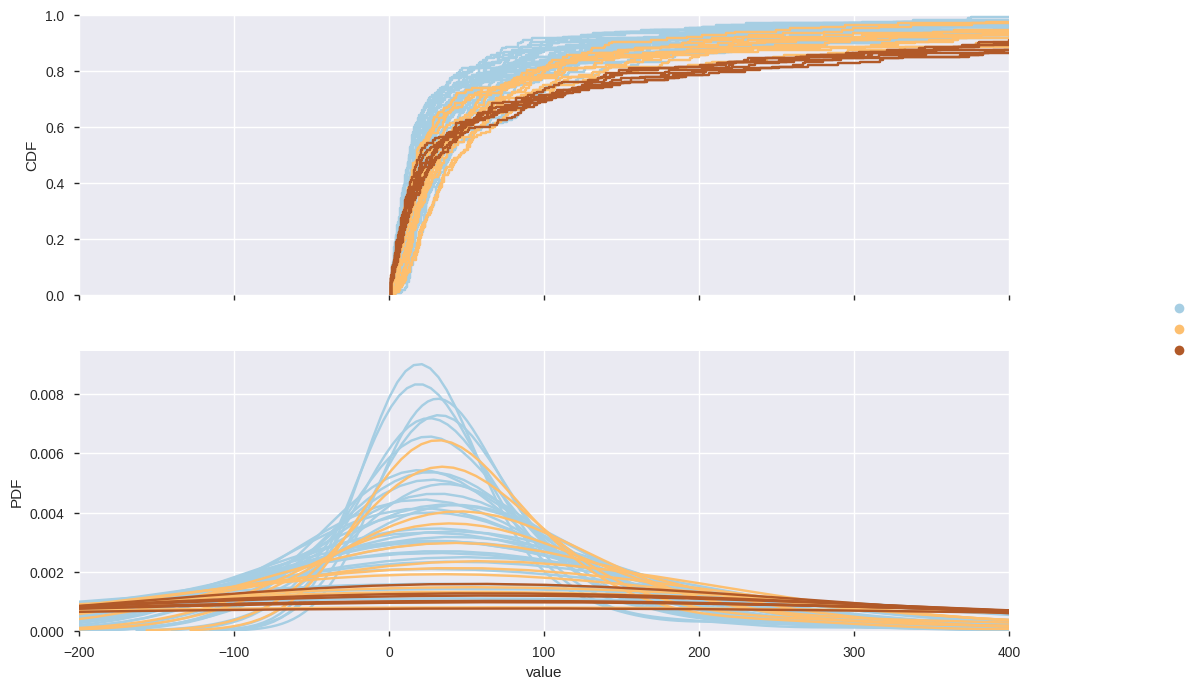

In [61]:
plot_cdfs(data, metadata['group'], xmin=-200, xmax=400)

we also observe that median and 3rd quantiles tend to differ slighlty between samples, from left to right, though they are somewhat similar

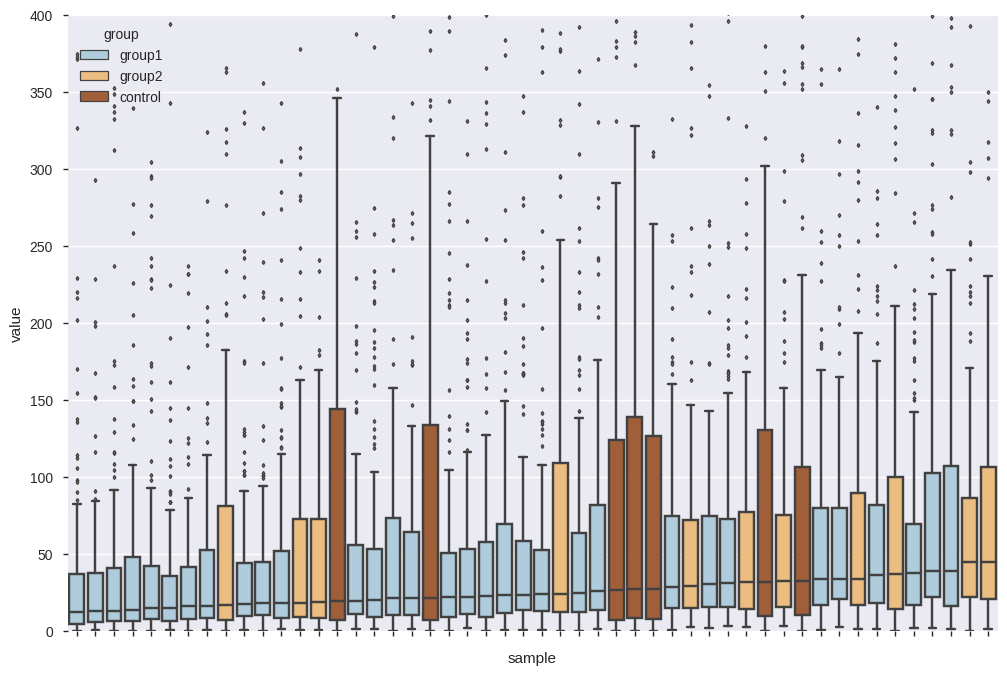

In [63]:
plot_boxplots(data, metadata['group'], ymin=0, ymax=400)

These could prompt us to go back to the anomaly detection section, or we may be biasing our data with respect to these potential outliers. We will skip this for now and proceed with the data transformation.
Note that in many cases, data rescaling is performed in columns (features) so that downstream methods do not simply reflect differences in magnitude. Here we will employ it on rows (samples) so we will transpose the matrices throughout.

##Scaling

Scaling centers the data by subtracting or adding a constant, and then dividing by another constant. This is what MinMaxScaler does: it subtracts the minimum and divides by the minimum, and divides by the range, i.e.:

$X_{scaled} = \frac{X_i - X_{min}}{X_{max} - X_{min}}$

where $X_{min}$ and $X_{max}$ are the vector minimum and maximum. Data is rescaled to between 0 and 1. THis preserves the original data structure and does not reduce the weight that potential outliers may have

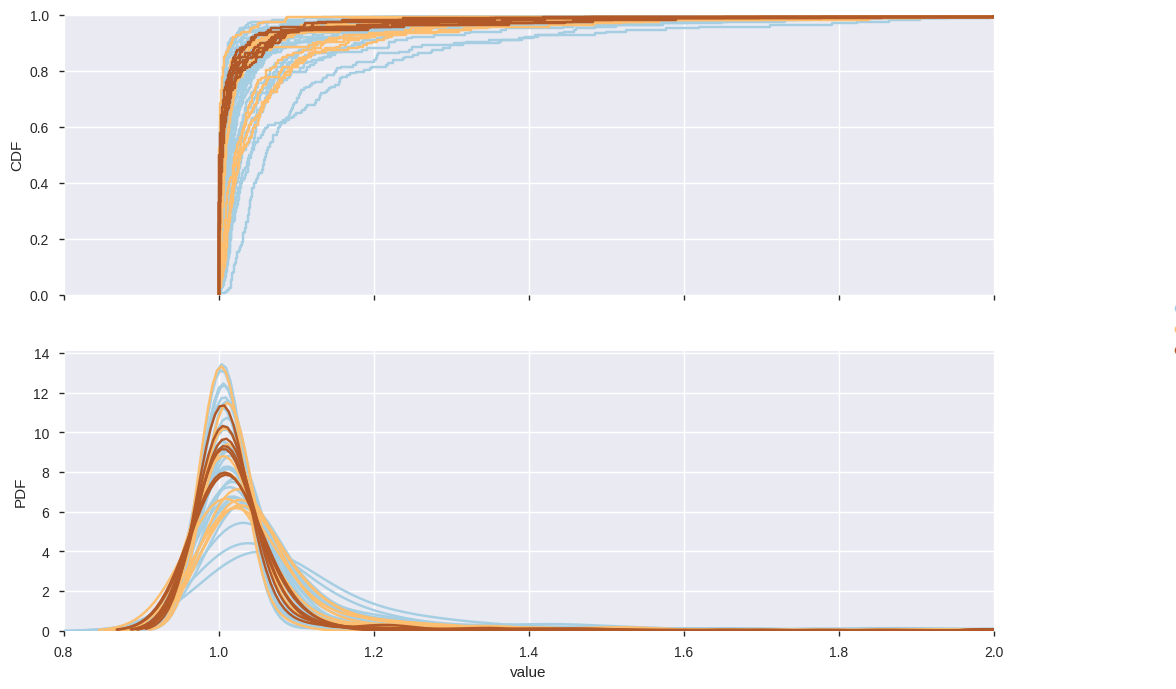

In [64]:
## the original df is transposed so that scaling is applied on samples and not on features in this case
minmax_data=pd.DataFrame(
    sklearn.preprocessing.MinMaxScaler().fit_transform(data.T).T, index=data.index, columns=data.columns)

#Note that the PDF below seems to go up to 2 but this is only because of the kernel estimate
plot_cdfs(minmax_data, metadata['group'], xmin=0.8, xmax=2)

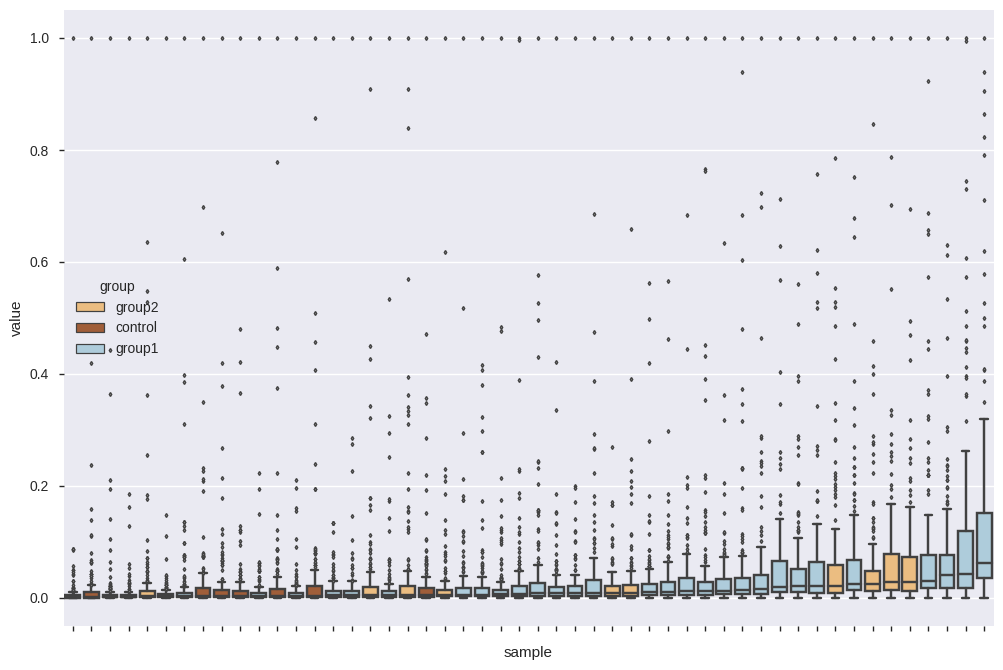

In [65]:
plot_boxplots(minmax_data, metadata['group'])

Note that each sample's maximum and minimums contain the same values (0 and 1), and most of the populations have been influenced by these extremes, leading to very different sample means, Q1 and Q3.

## Standardization
Data standardization removes the mean and divides by the standard deviation:
$X_{standardized} = \frac{X_i - x_{bar}}{s}$

where $X_{bar}$ is the mean and s is the standard deviation. Data become 0-centered and unit variance, but unlike scaling it is not bounded. this shrinks the data distribution, and outliers still influence the data when computing means and standard deviations

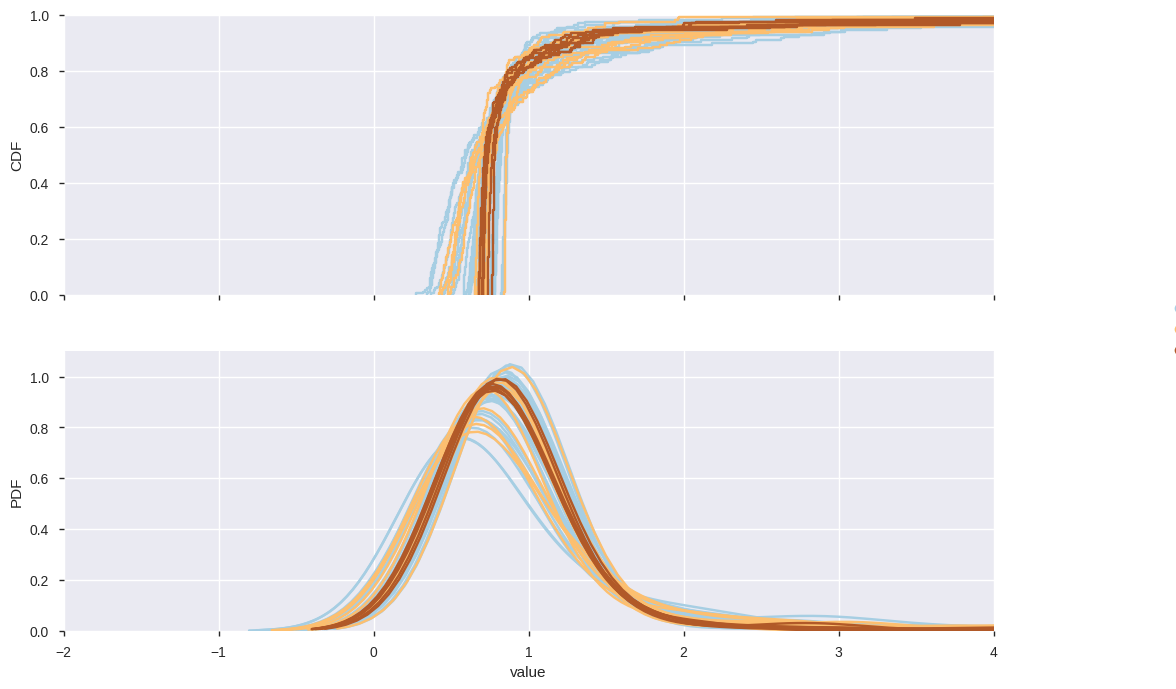

In [66]:
stdscaler_data=pd.DataFrame(
    sklearn.preprocessing.StandardScaler().fit_transform(data.T).T, index=data.index, columns=data.columns)

plot_cdfs(stdscaler_data, metadata['group'], xmin=-2, xmax=4)

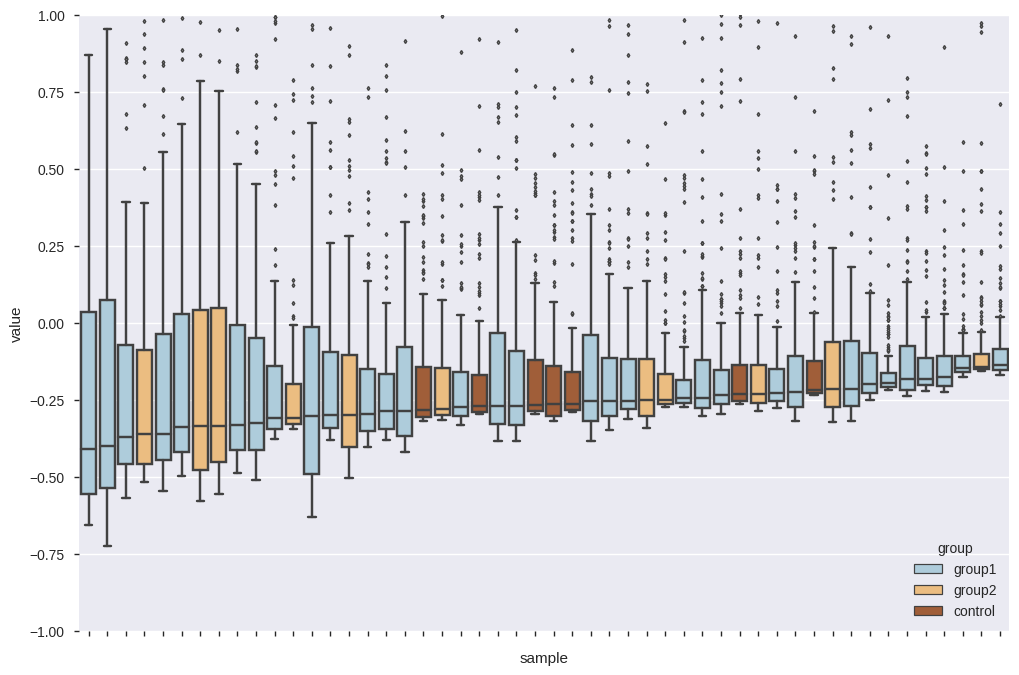

In [67]:
plot_boxplots(stdscaler_data, metadata['group'],ymin=-1, ymax=1)

In this case we observe that the effect of the outliers is not as dramatic as it was with MinMaxScaler, and that most samples contain similar means, Q1 and Q2. The data range is now squeezed mostly between -0.6 and 0.1.

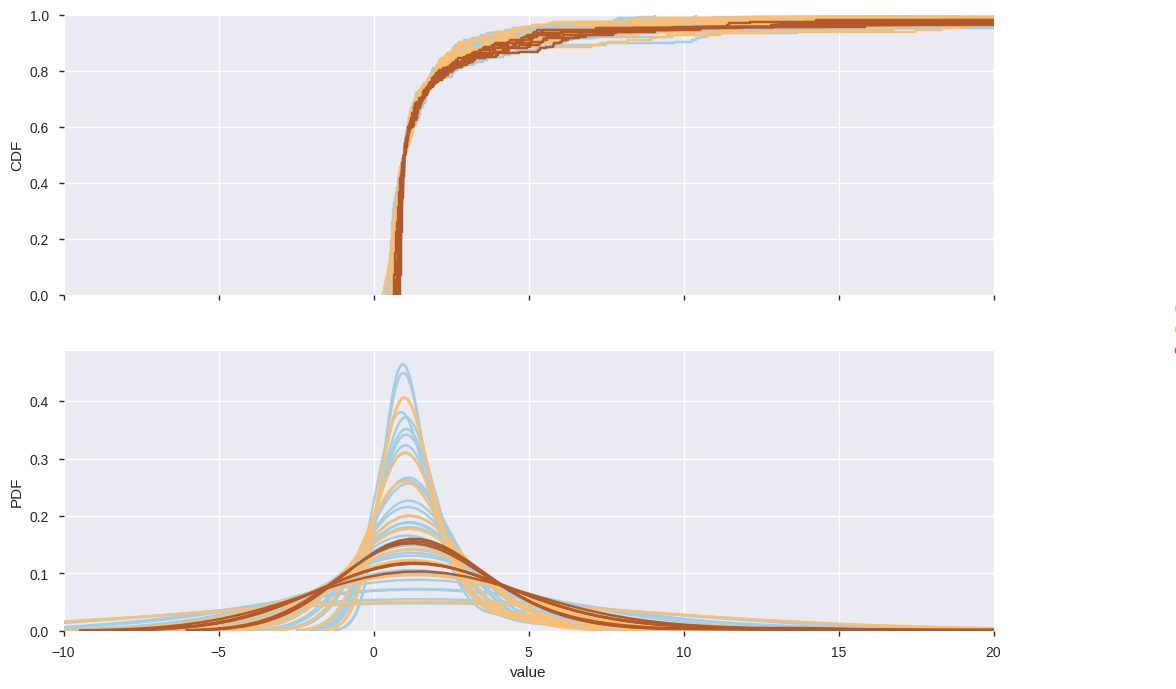

In [68]:
robustscaler_data=pd.DataFrame(sklearn.preprocessing.RobustScaler().fit_transform(data.T).T, index=data.index, columns=data.columns)

plot_cdfs(robustscaler_data, metadata['group'], xmin=-10, xmax=20)

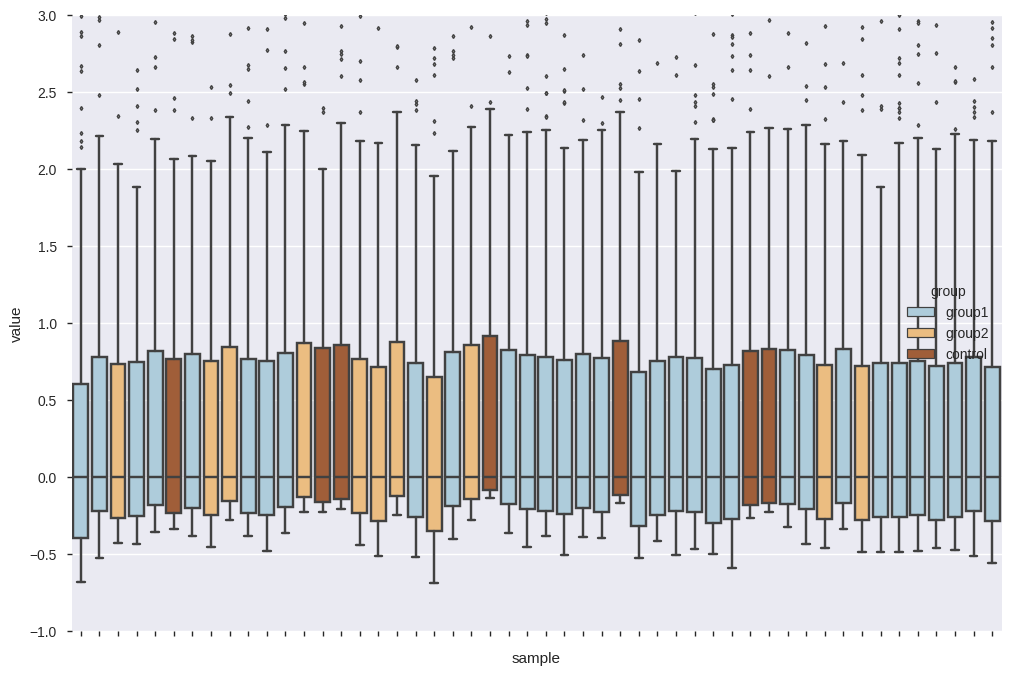

In [69]:
plot_boxplots(robustscaler_data, metadata['group'], ymin=-1, ymax=3)

The resulting data has larger ranges than in the case of MinMaxScaler or StandardScaler. We can see that outliers (those outside of the IQR as we have seen above) had no influence in standardizing the data.

## Quantile normalization
Pre-processing with quantile normalization usually leads to robust results as it maps the data to follow a uniform or normal distribution, reducing the effect of extreme values. It occurs in two steps: first, a CDF is used to map values onto a uniform distribution. Secodn, the recast values are then mapped to a desired output distribution. Any new data falling out of bounds of this new function are mapped to the output distribution bounds.

An important caveat should be taken into account: due to the steps above, linearly-correlated variables quantified within the same scale may lose their relationships, but very different variables will become more comparable.

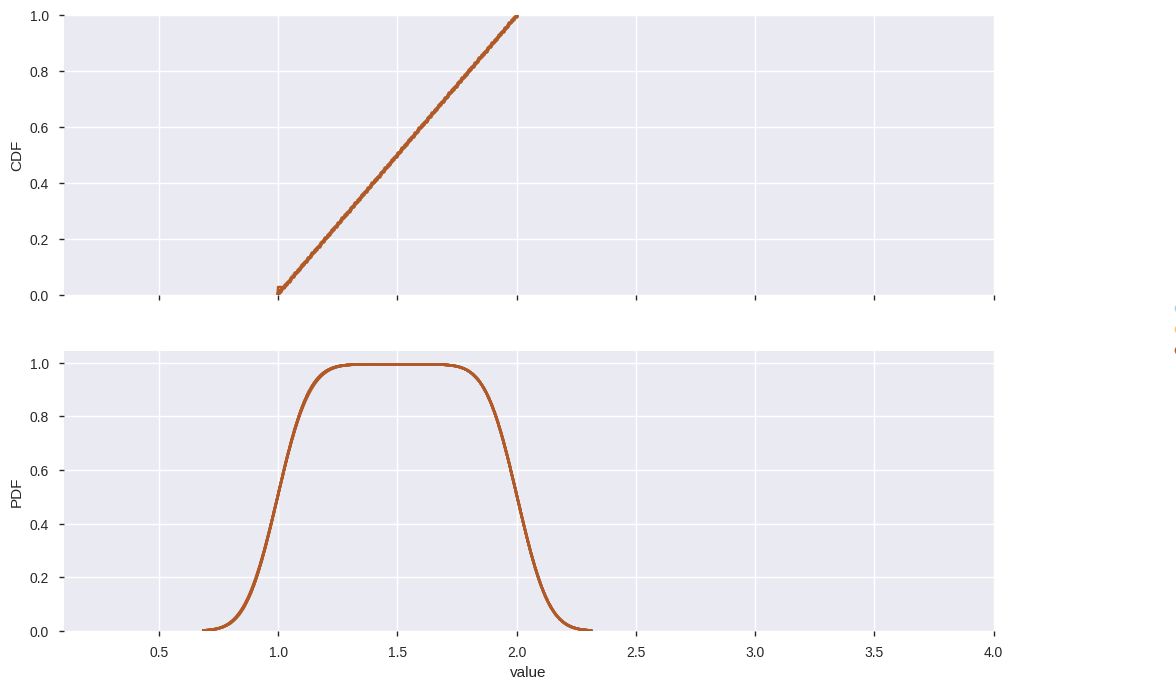

In [70]:
quantile_data=pd.DataFrame(sklearn.preprocessing.QuantileTransformer(n_quantiles=data.shape[1]).fit_transform(data.T).T, index=data.index, columns=data.columns)

plot_cdfs(quantile_data, metadata['group'], xmax=4)

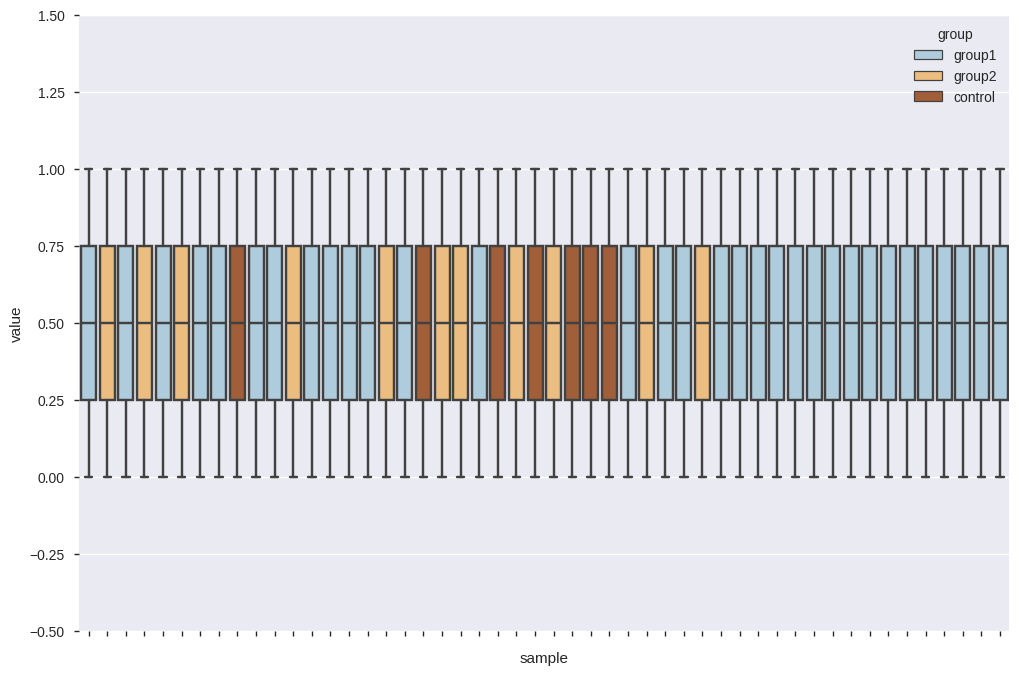

In [71]:
plot_boxplots(quantile_data, metadata['group'], ymin=-0.5, ymax=1.5)

This normalization method works very well, but comes at the danger of removing important biological variability as it can be observed by the perfect quantile, mean and extreme values in the boxplots above.

## Normalization
Normalization refers to rescaling the data to have similar scales. For instance, with normalize we will rescale all data to have unit norm, i.e. the sum of squares of all elements in a vector adds to 1. This is usually not so useful in most cases.

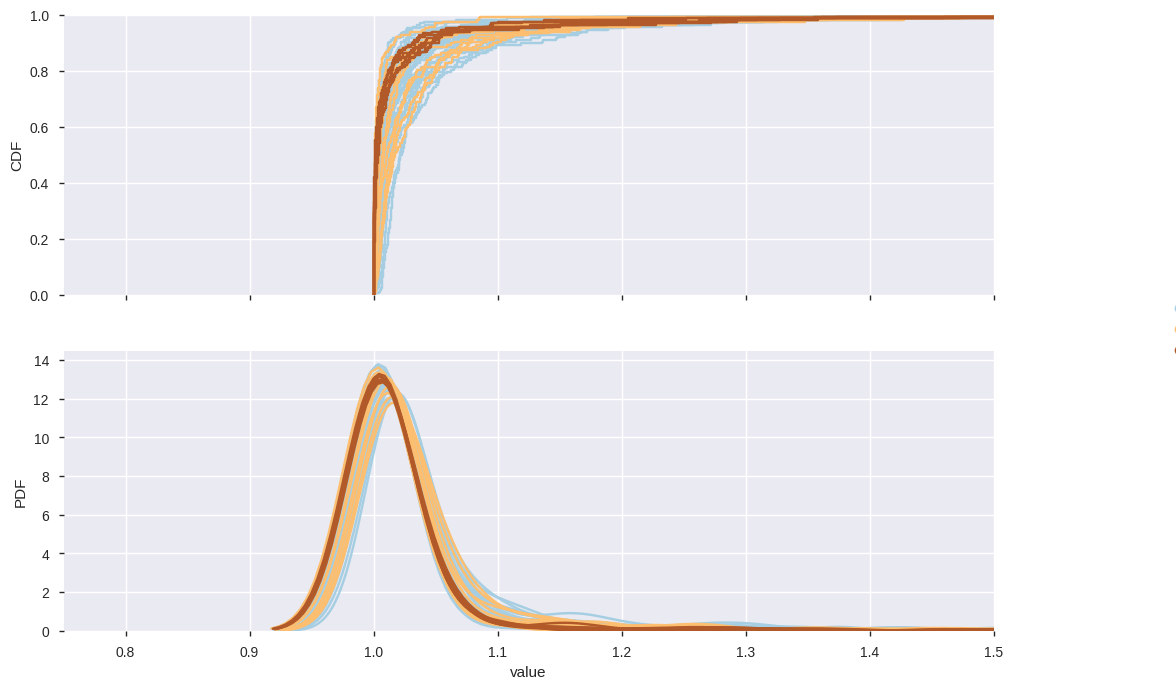

In [72]:
## normalize works on rows by default
normalize_data=pd.DataFrame(
    sklearn.preprocessing.normalize(data), index=data.index, columns=data.columns)

plot_cdfs(normalize_data, metadata['group'], xmin=0.75, xmax=1.5)

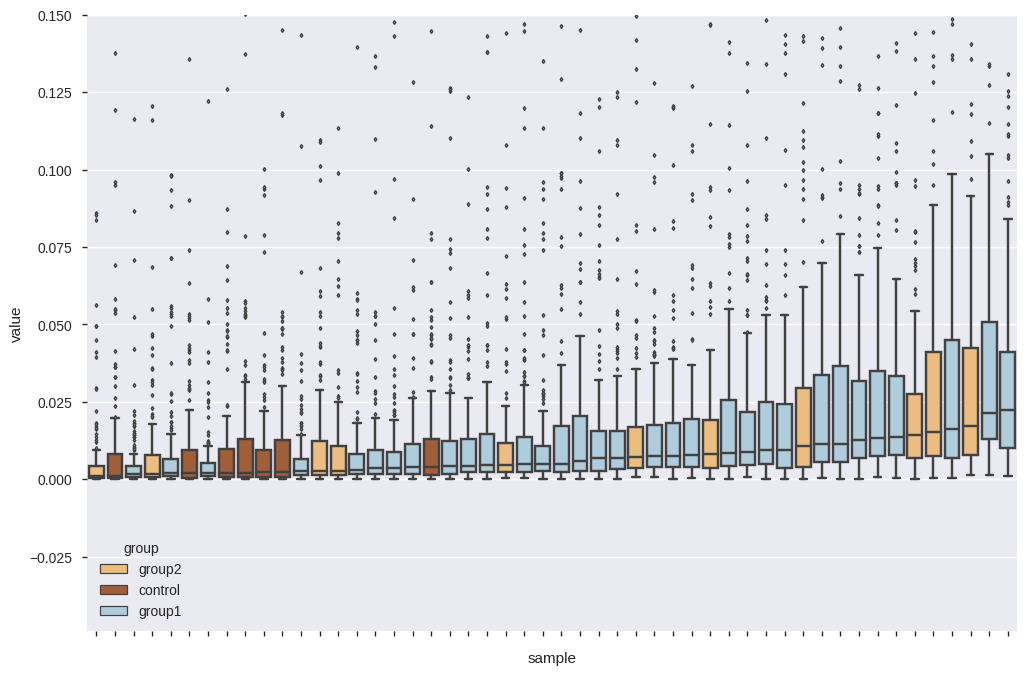

In [73]:
plot_boxplots(normalize_data, metadata['group'], ymax=0.15)

## COMBAT
COMBAT is a well known function used to remove batch effects in R. Basically, this method uses a linear mixed model of location (mean) and scale (range) within each batch, and then adjusted across batches, through a bayesian approach. In Python, it is implemented through pyComBat. For demonstration purposes, we will consider groups as batches:

In [74]:
# groups converted to indices
batch = pd.Categorical(metadata['group']).codes

combat_data = pycombat(data.T,batch).T

Found 3 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


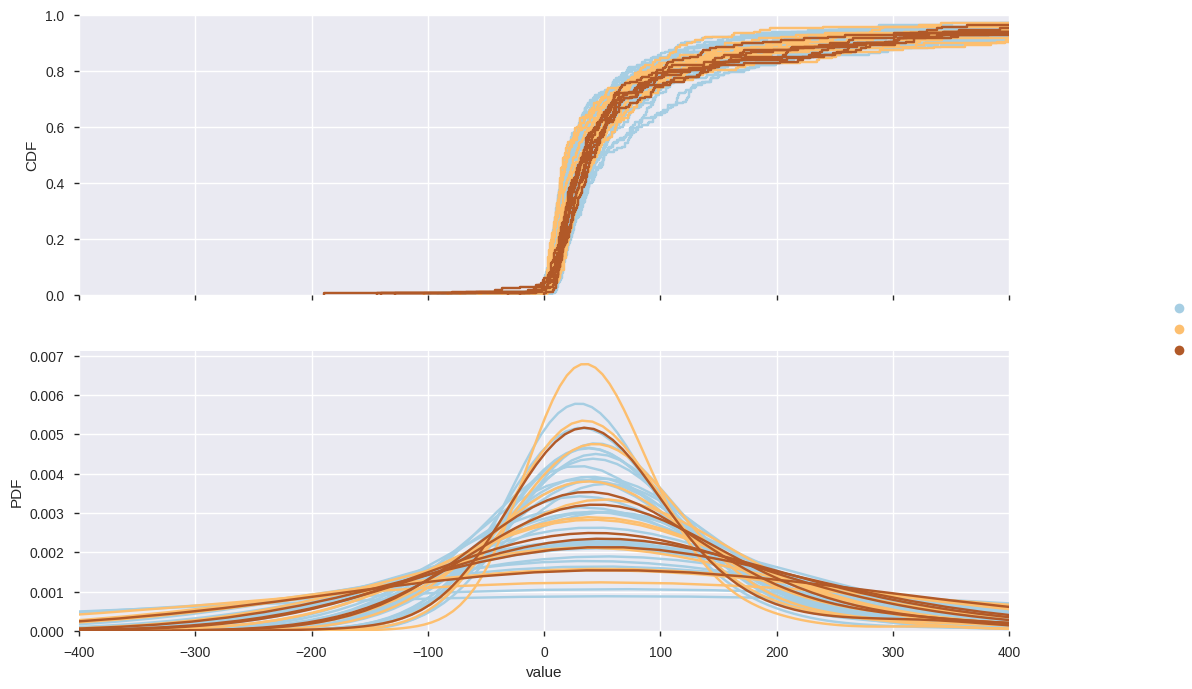

In [75]:
plot_cdfs(combat_data, metadata['group'], xmin=-400, xmax=400)

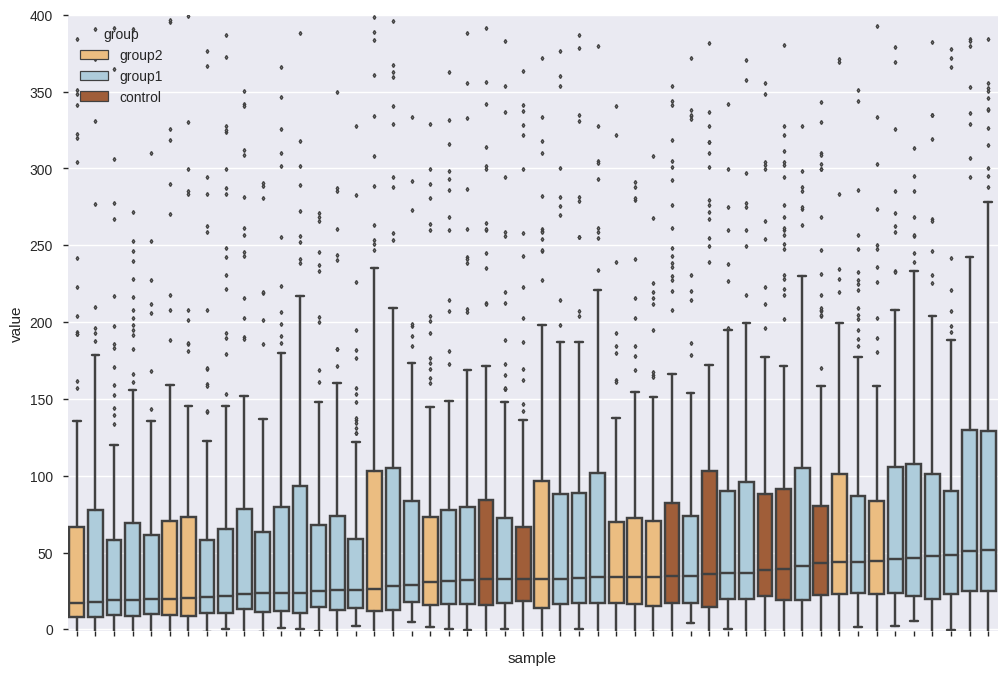

In [76]:
plot_boxplots(combat_data, metadata['group'], ymin=-1, ymax=400)

The boxplot above shows that samples in the control and group2 now display higher median expression compared to the raw data. ComBat retains the outlier values and these do not have such a strong effect on overall data distributions.

## Summary
The observations above show that some data rescaling approaches have stronger effects than others, at the danger of removing or adding artifacts that are not biologically truthful. As a rule of thumb you should always compare the effect that data normalization may have on your dataset, and if you have any marker features (e.g. internal standards, biomarkers or housekeeping genes) that you can use to compare between samples it may assist you in deciding which rescaling approach to use. You should also question whether you even need to normalize your data, or if your downstream analyses are robust to heavily tailed data, distinct ranges, our outliers. While the observations above point to some better rescaling approaches in some cases, one cannot define a rule of thumb for all datasets, and you should attentively examine different methods.

## Final notes

In this notebook we examined different data pre-processing approaches. Note that this notebook represents only an introduction to data pre-processing, as many other methods could be applied throughout. Often, it is necessary to re-examine a specific data feature after a given step was taken. For instance, if you find that a given sample has been deemed as an outlier, it is perhaps worth to do data imputation after excluding that sample.
The workflow above should be seen as a suggestion, and it does not replace any technology-tailored pre-processing guidelines. Rather, with this workflow we want to call your attention to specific issues that may arise when preparing your dataset for downstream analysis.